
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

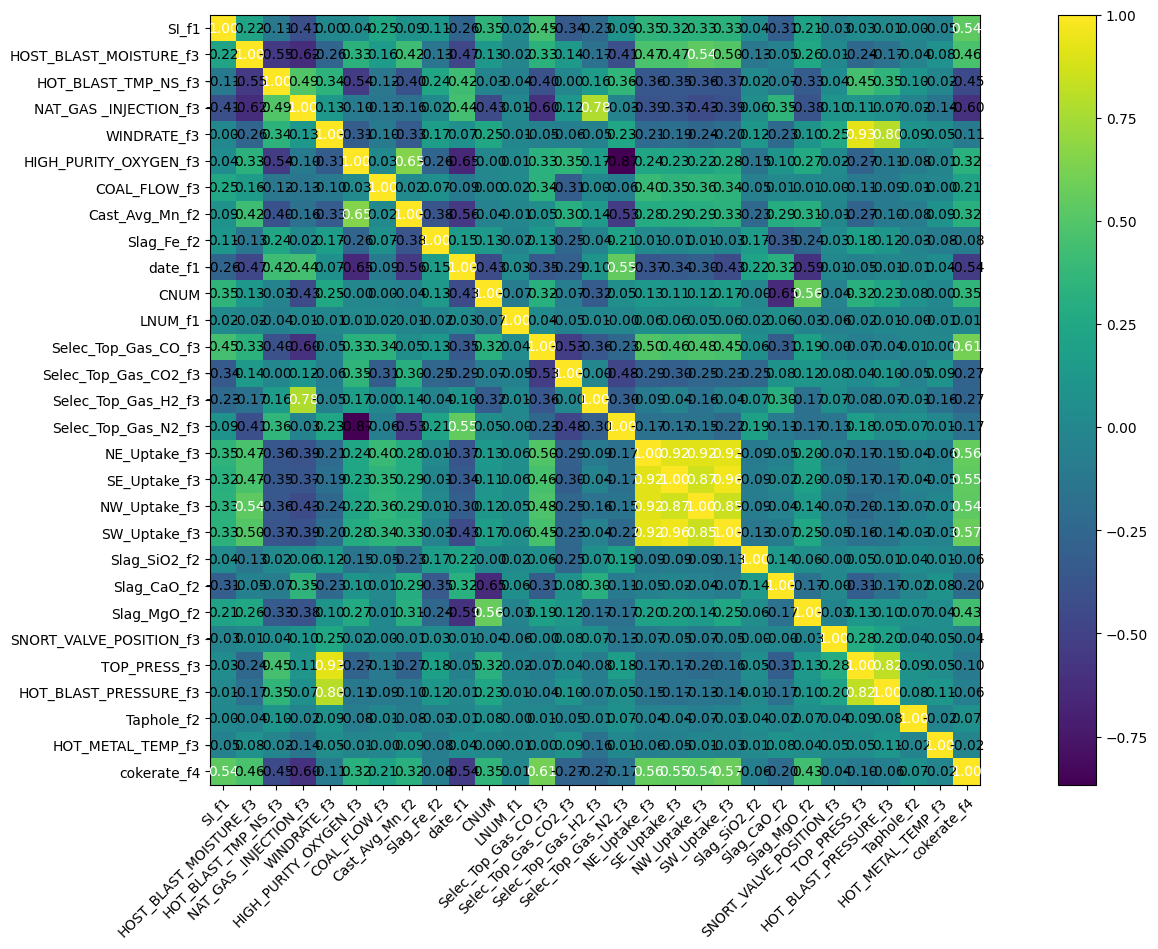

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

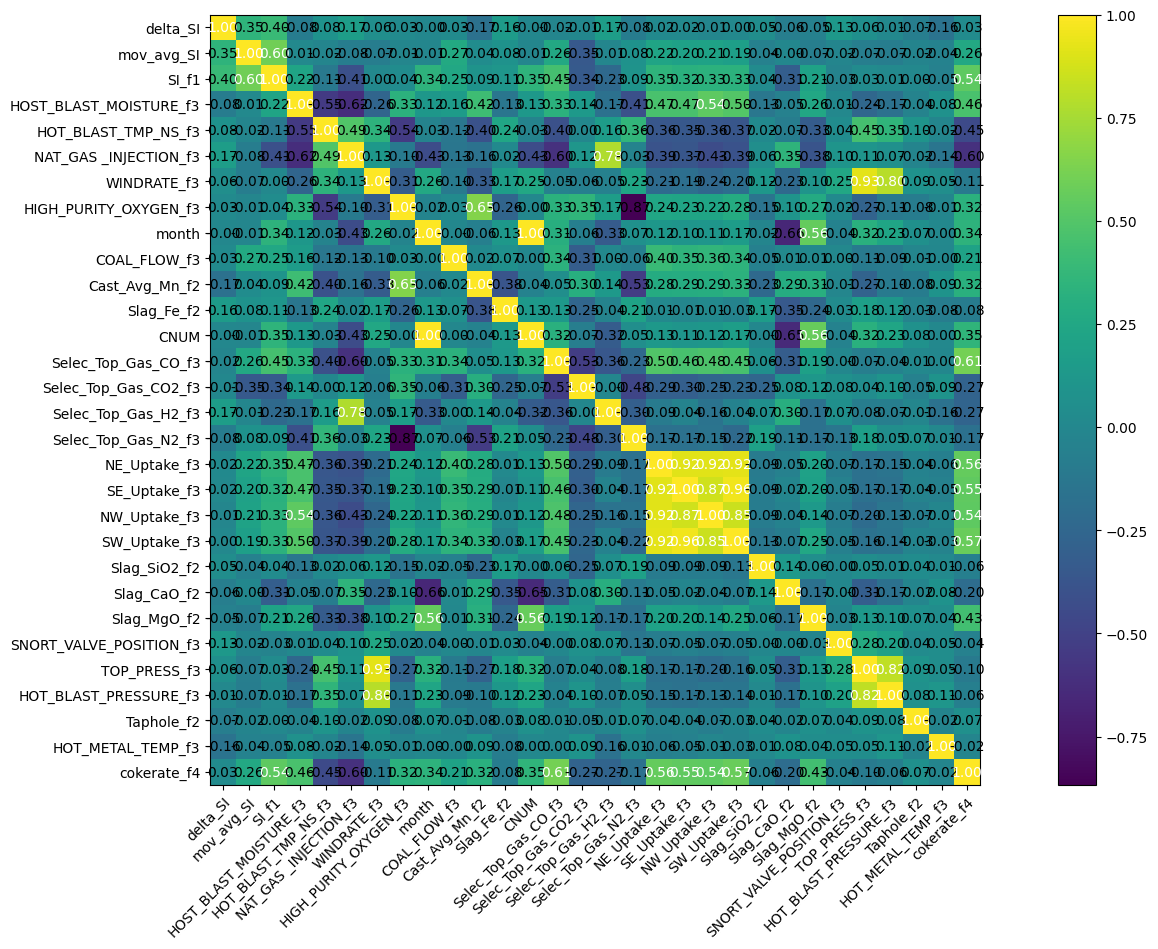

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.911329
Loss_SI: 0.8931245803833008 Loss_all: 1.0751686096191406
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.113860
Loss_SI: 0.045789606869220734 Loss_all: 0.7264950275421143
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.063778
Loss_SI: 0.016466937959194183 Loss_all: 0.4895811080932617
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.055042
Loss_SI: 0.021559782326221466 Loss_all: 0.35638153553009033
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.043672
Loss_SI: 0.008826227858662605 Loss_all: 0.357287734746933
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.036696
Loss_SI: 0.005684763193130493 Loss_all: 0.31579917669296265
Prediction shape: torch.Size([32, 35])
===


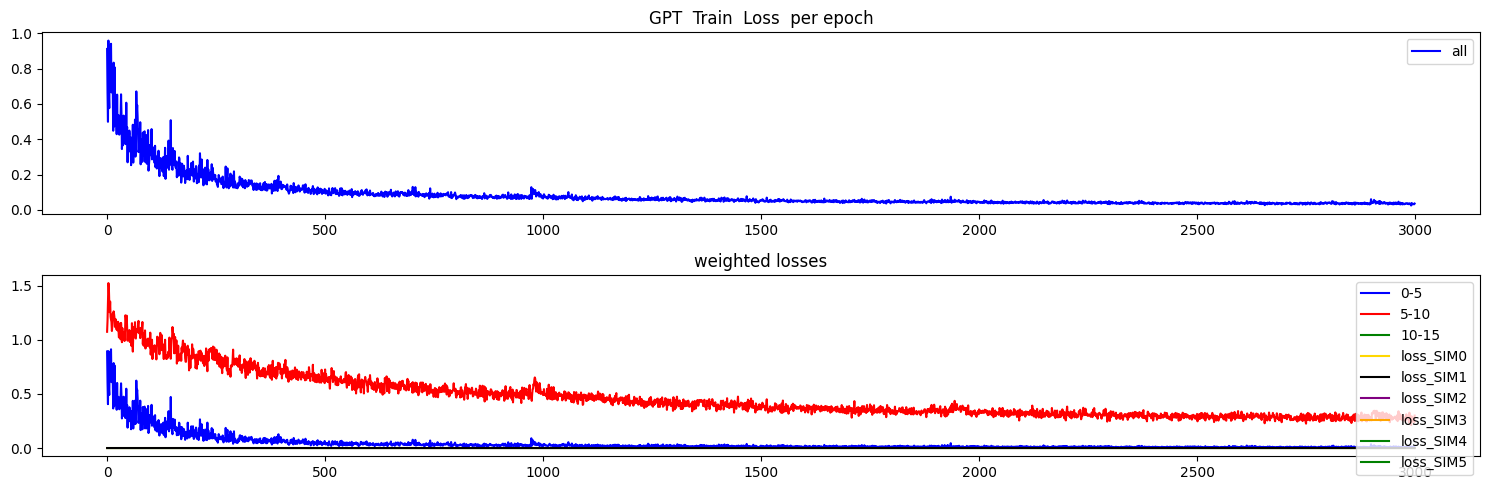

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


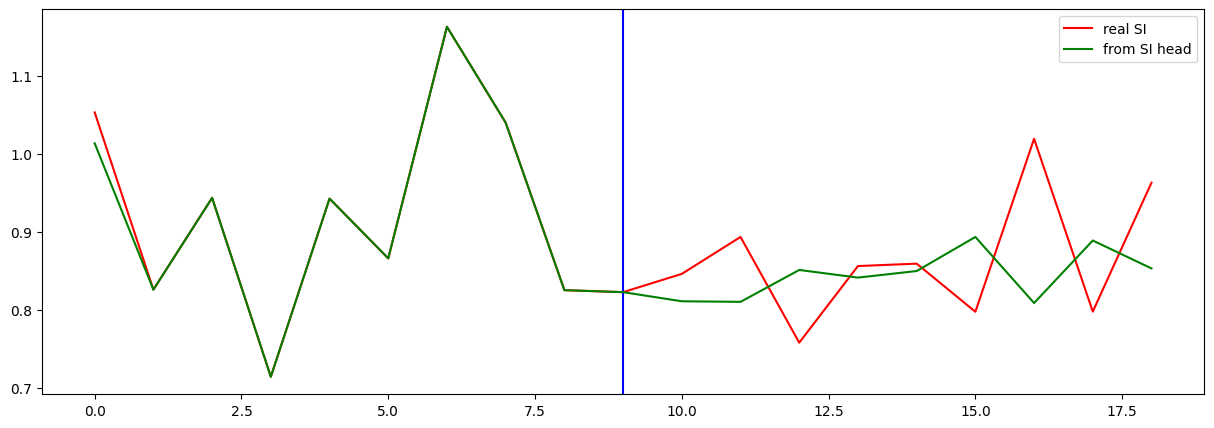

Testing R**2 - (all) - (no inputs):  0.9712288527287043
Testing R**2 - (f2) - SI full (no inputs):  -1.0295884720880761
Testing R**2 - SI head only (no inputs):  0.13104303001304096
0 ...index R**2 (no inputs):  -1.0094744521704682
1 ...index R**2 (no inputs):  -1.108456156993065
2 ...index R**2 (no inputs):  -1.0295884720880761
3 ...index R**2 (no inputs):  -7.244233193919685
4 ...index R**2 (no inputs):  0.12328367097461301
5 ...index R**2 (no inputs):  -6.529880140399867
6 ...index R**2 (no inputs):  -0.20082481934966845
7 ...index R**2 (no inputs):  -0.22256762894872395
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9267827969344753
10 ...index R**2 (no inputs):  -0.14050252613072334
11 ...index R**2 (no inputs):  -18.362727394144645
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8666364670425912
16 ...index R**2 (no inputs):  -2.3987519220508835
17 ...index R**2 (no inpu

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.446663
Loss_SI: 0.37404268980026245 Loss_all: 1.1002432107925415
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.133665
Loss_SI: 0.07896117866039276 Loss_all: 0.6259945034980774
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.079693
Loss_SI: 0.028591403737664223 Loss_all: 0.5396086573600769
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.066186
Loss_SI: 0.029788052663207054 Loss_all: 0.3937666416168213
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.075953
Loss_SI: 0.023263195529580116 Loss_all: 0.550163984298706
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.054047
Loss_SI: 0.01497494988143444 Loss_all: 0.4057003855705261
Prediction shape: torch.Size([32, 35])
===


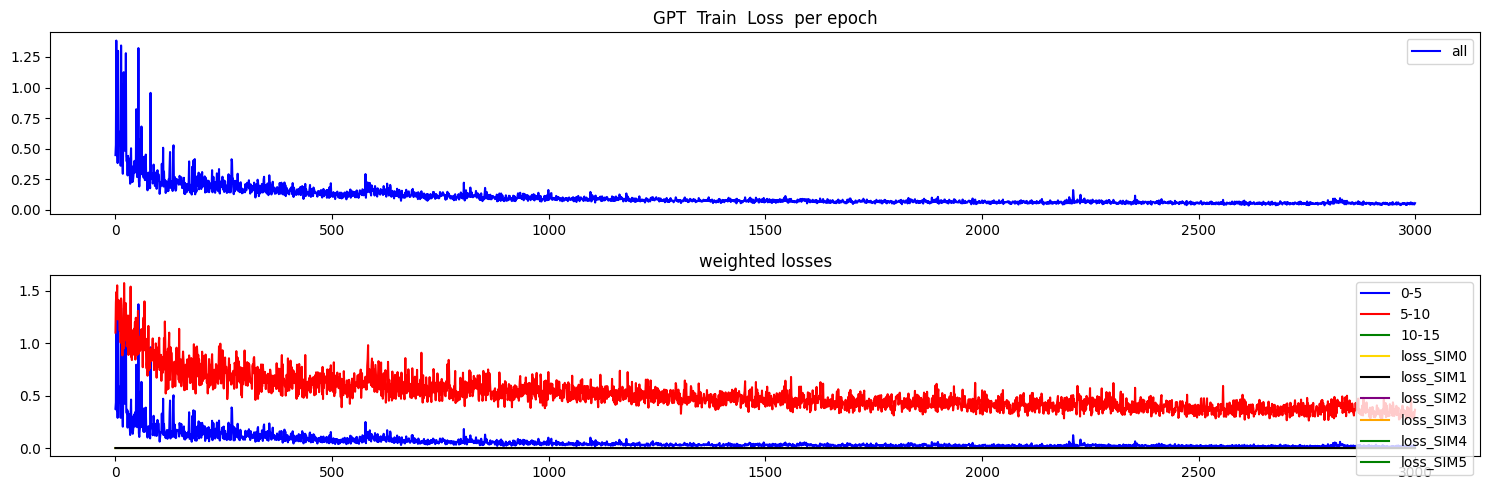

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


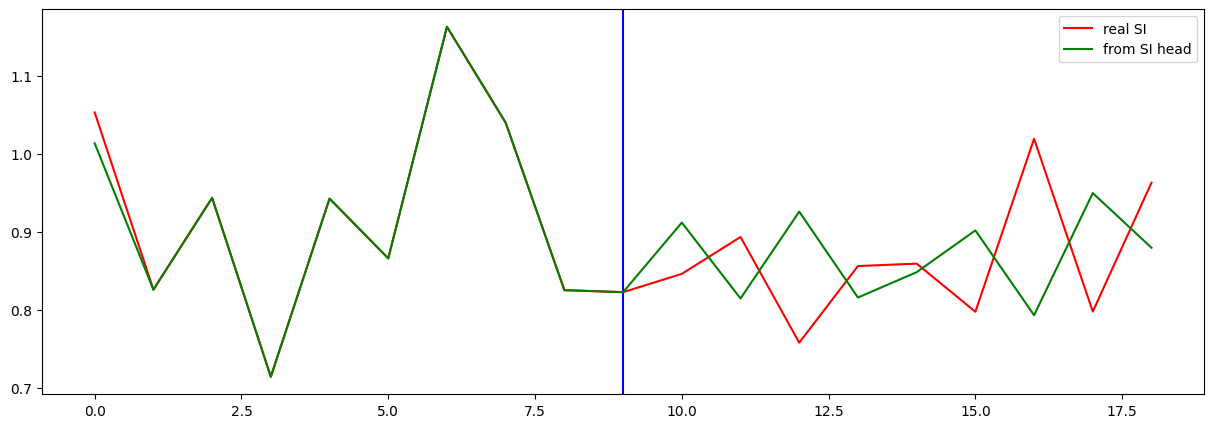

Testing R**2 - (all) - (no inputs):  0.9922954700049111
Testing R**2 - (f2) - SI full (no inputs):  -1.4810682999186375
Testing R**2 - SI head only (no inputs):  0.331447107686364
0 ...index R**2 (no inputs):  -0.9218517263514447
1 ...index R**2 (no inputs):  -0.36245764328055285
2 ...index R**2 (no inputs):  -1.4810682999186375
3 ...index R**2 (no inputs):  -1.2996088884472767
4 ...index R**2 (no inputs):  -0.8470390536786248
5 ...index R**2 (no inputs):  -1.0034535586129913
6 ...index R**2 (no inputs):  -1.0247908710734404
7 ...index R**2 (no inputs):  -0.27929344864051586
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4305491180163328
10 ...index R**2 (no inputs):  -0.18831956736471978
11 ...index R**2 (no inputs):  -231.90132106693568
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1555801890051542
16 ...index R**2 (no inputs):  -0.21433287320569416
17 ...index R**2 (no in

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.434688
Loss_SI: 0.37039250135421753 Loss_all: 1.0133455991744995
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.125825
Loss_SI: 0.08609828352928162 Loss_all: 0.4833645224571228
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.122897
Loss_SI: 0.06305311620235443 Loss_all: 0.6614934206008911
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.116696
Loss_SI: 0.05387096852064133 Loss_all: 0.6821224689483643
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.124919
Loss_SI: 0.08154864609241486 Loss_all: 0.5152480006217957
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.096644
Loss_SI: 0.058387391269207 Loss_all: 0.4409489631652832
Prediction shape: torch.Size([32, 35])
===


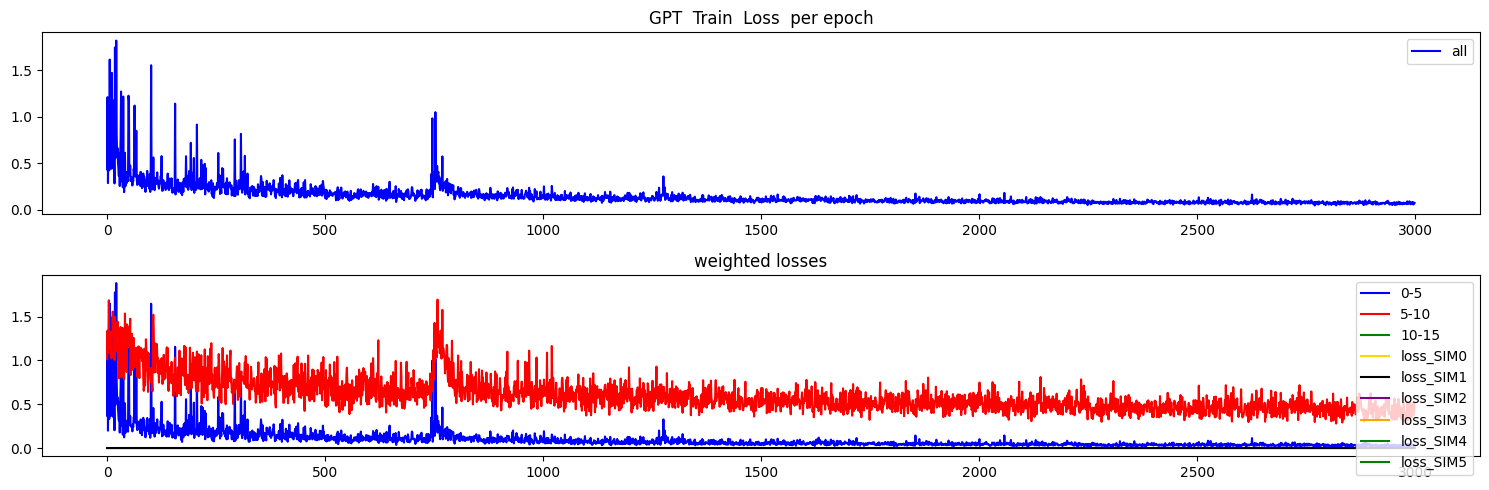

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


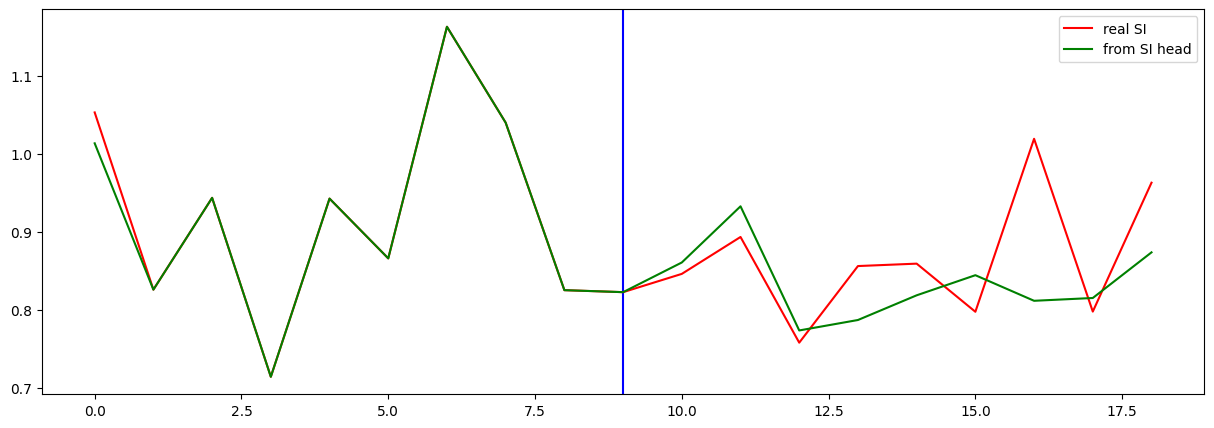

Testing R**2 - (all) - (no inputs):  0.9608097927944037
Testing R**2 - (f2) - SI full (no inputs):  -3.2967881429051014
Testing R**2 - SI head only (no inputs):  -0.5124739106849228
0 ...index R**2 (no inputs):  -0.1721846903532276
1 ...index R**2 (no inputs):  -1.1658190650128182
2 ...index R**2 (no inputs):  -3.2967881429051014
3 ...index R**2 (no inputs):  0.45966036345608574
4 ...index R**2 (no inputs):  -17.391163386709785
5 ...index R**2 (no inputs):  -9.00320460834752
6 ...index R**2 (no inputs):  -0.08650430076004789
7 ...index R**2 (no inputs):  -7.97487298621196
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06898446954714865
10 ...index R**2 (no inputs):  0.16116812113325607
11 ...index R**2 (no inputs):  -30.097226727340022
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.198893948727007
16 ...index R**2 (no inputs):  -0.6576688989710038
17 ...index R**2 (no inputs)

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.930742
Loss_SI: 0.8754410743713379 Loss_all: 1.428451418876648
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.171396
Loss_SI: 0.11889062076807022 Loss_all: 0.6439394354820251
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.147292
Loss_SI: 0.09727972745895386 Loss_all: 0.5973984003067017
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.145234
Loss_SI: 0.09113946557044983 Loss_all: 0.6320887804031372
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.104050
Loss_SI: 0.0556831881403923 Loss_all: 0.5393560528755188
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.118473
Loss_SI: 0.08101847767829895 Loss_all: 0.4555666744709015
Prediction shape: torch.Size([32, 35])
===


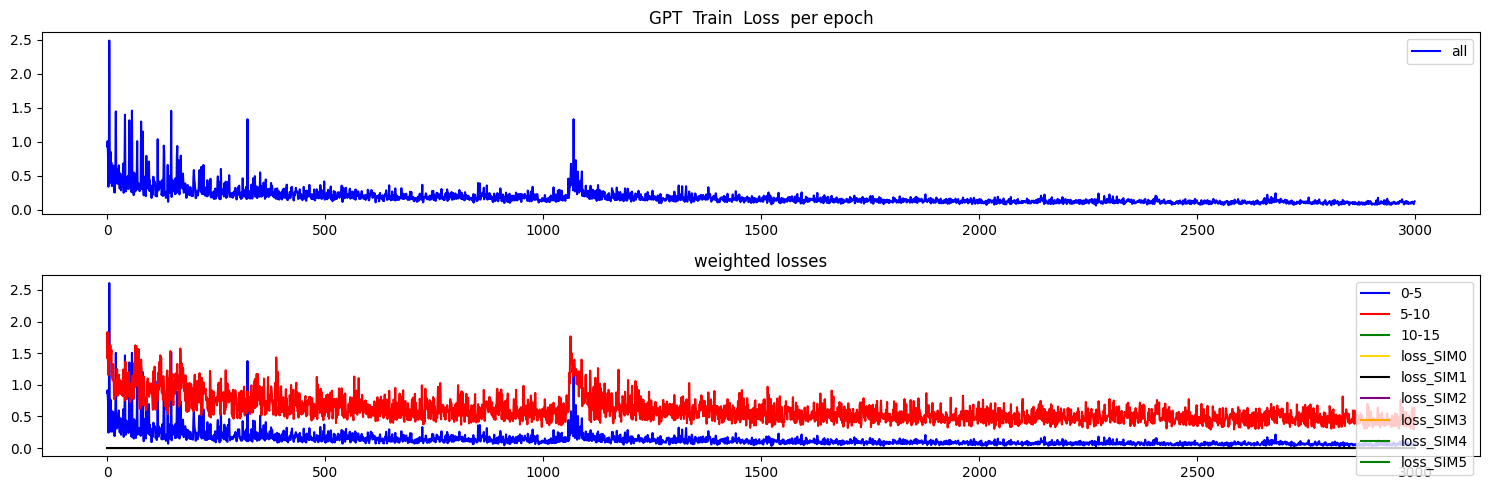

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


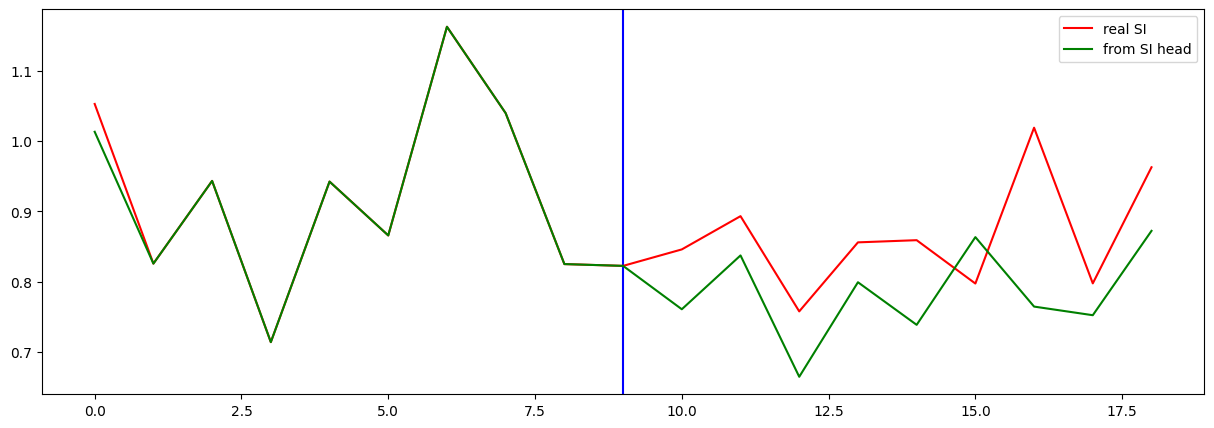

Testing R**2 - (all) - (no inputs):  0.9620788549844786
Testing R**2 - (f2) - SI full (no inputs):  -7.758448292311085
Testing R**2 - SI head only (no inputs):  -0.9918632832662926
0 ...index R**2 (no inputs):  -0.35395706197391696
1 ...index R**2 (no inputs):  -2.2417644215267223
2 ...index R**2 (no inputs):  -7.758448292311085
3 ...index R**2 (no inputs):  -1.0279331159618437
4 ...index R**2 (no inputs):  -60.89298007621737
5 ...index R**2 (no inputs):  -7.885936800927057
6 ...index R**2 (no inputs):  -0.6191858114873714
7 ...index R**2 (no inputs):  -5.71269567169258
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.18992930066107072
10 ...index R**2 (no inputs):  -0.19959394669213038
11 ...index R**2 (no inputs):  -293.83194393414175
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.318352806380943
16 ...index R**2 (no inputs):  -0.14503668196788078
17 ...index R**2 (no inputs)

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.536296
Loss_SI: 0.4814184606075287 Loss_all: 1.0301918983459473
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.078325
Loss_SI: 0.02835378423333168 Loss_all: 0.5280699729919434
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.055265
Loss_SI: 0.018168559297919273 Loss_all: 0.3891325891017914
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.043680
Loss_SI: 0.01502457819879055 Loss_all: 0.3015800714492798
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.029985
Loss_SI: 0.0066926563158631325 Loss_all: 0.23961608111858368
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.046768
Loss_SI: 0.011741168797016144 Loss_all: 0.36201295256614685
Prediction shape: torch.Size([32, 35])
===


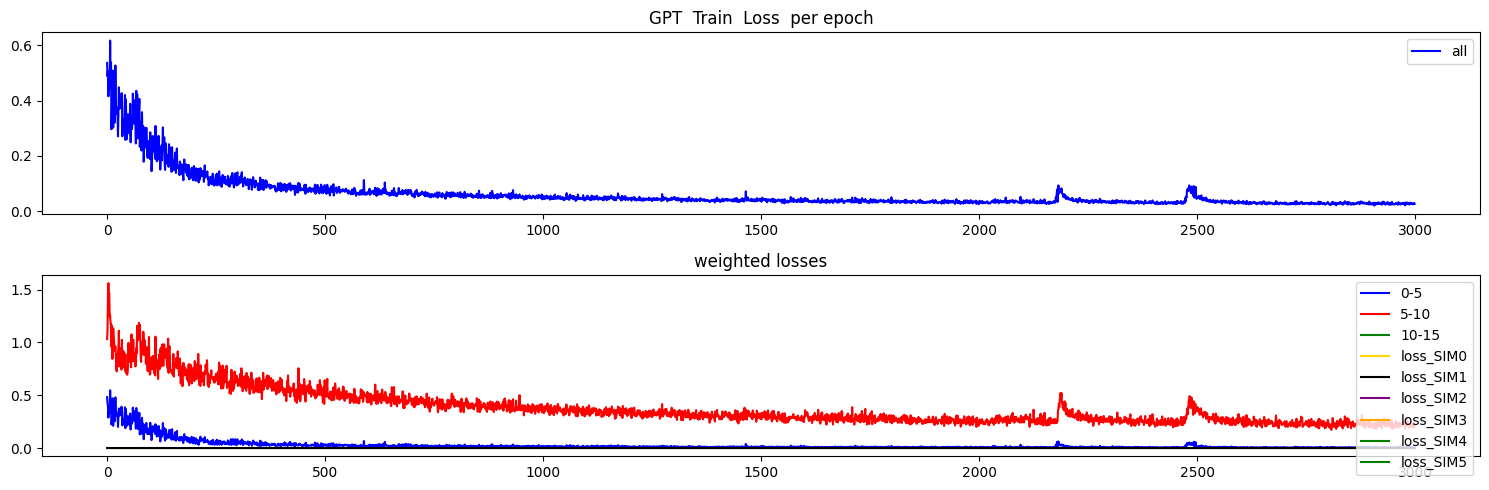

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


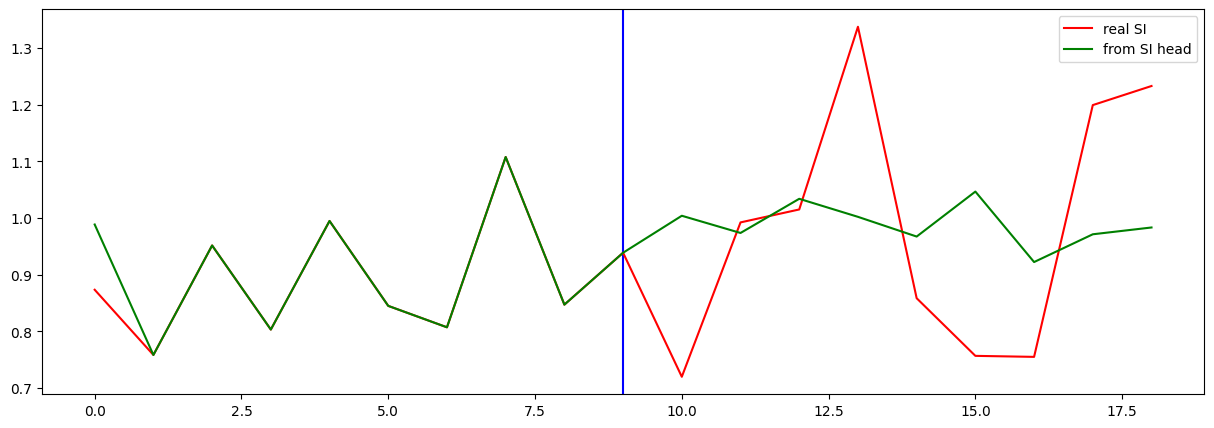

Testing R**2 - (all) - (no inputs):  0.993729676294958
Testing R**2 - (f2) - SI full (no inputs):  -0.4924873483617911
Testing R**2 - SI head only (no inputs):  -0.10435512971540328
0 ...index R**2 (no inputs):  -0.24979692830205513
1 ...index R**2 (no inputs):  -2.0068274882237422
2 ...index R**2 (no inputs):  -0.4924873483617911
3 ...index R**2 (no inputs):  -8.806327601396898
4 ...index R**2 (no inputs):  -60.82256891420056
5 ...index R**2 (no inputs):  -0.9779417391431127
6 ...index R**2 (no inputs):  -111.52912228960895
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3657057685445617
10 ...index R**2 (no inputs):  -1.2354193581229902
11 ...index R**2 (no inputs):  -7.371805840159576
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.35472335333259
16 ...index R**2 (no inputs):  -0.37478039495313165
17 ...index R**2 (no inputs):  -3.2137712381

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.637300
Loss_SI: 0.5860053300857544 Loss_all: 1.098949670791626
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.174028
Loss_SI: 0.10695099830627441 Loss_all: 0.7777186036109924
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.122341
Loss_SI: 0.05655243247747421 Loss_all: 0.7144383192062378
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.073086
Loss_SI: 0.03428928554058075 Loss_all: 0.4222583472728729
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.063330
Loss_SI: 0.030364524573087692 Loss_all: 0.36001864075660706
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.060458
Loss_SI: 0.02226882055401802 Loss_all: 0.4041653275489807
Prediction shape: torch.Size([32, 35])
===


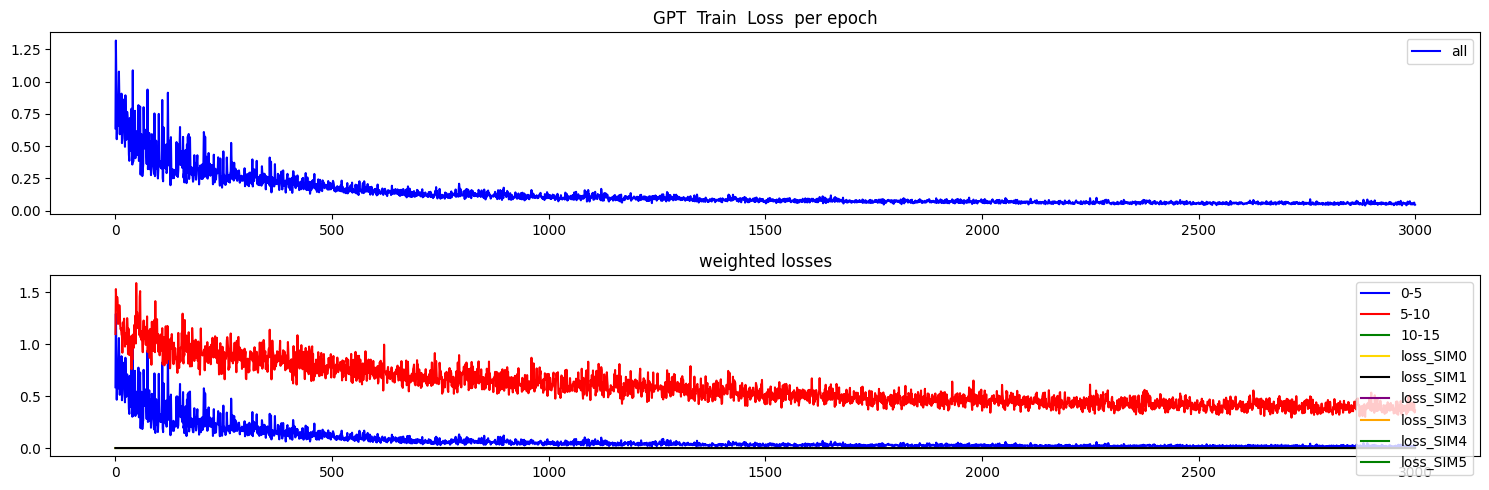

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


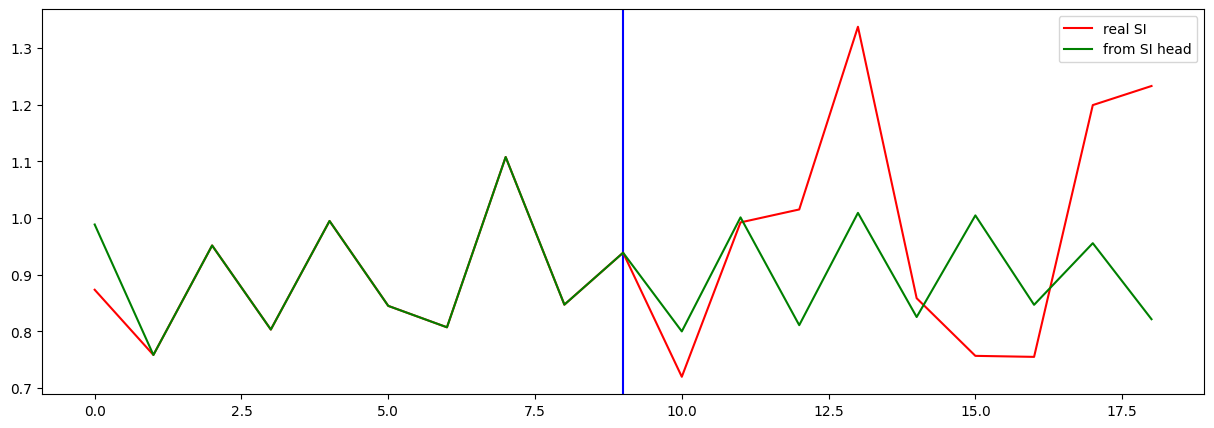

Testing R**2 - (all) - (no inputs):  0.9898413677630403
Testing R**2 - (f2) - SI full (no inputs):  -0.5138681962687013
Testing R**2 - SI head only (no inputs):  -0.6732709987472227
0 ...index R**2 (no inputs):  -0.464915961006912
1 ...index R**2 (no inputs):  -2.38469363273446
2 ...index R**2 (no inputs):  -0.5138681962687013
3 ...index R**2 (no inputs):  -6.220797711613185
4 ...index R**2 (no inputs):  -45.057285104917646
5 ...index R**2 (no inputs):  -2.211091913428446
6 ...index R**2 (no inputs):  -88.69134216480592
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.497950765805234
10 ...index R**2 (no inputs):  -0.7226809204097873
11 ...index R**2 (no inputs):  -27.680434021805237
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6847114451950345
16 ...index R**2 (no inputs):  -0.8326228767859425
17 ...index R**2 (no inputs):  -52.4212204338991

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.495760
Loss_SI: 0.43173447251319885 Loss_all: 1.071993112564087
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.212564
Loss_SI: 0.15447023510932922 Loss_all: 0.7354120016098022
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.181740
Loss_SI: 0.13648729026317596 Loss_all: 0.5890178680419922
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.103519
Loss_SI: 0.0567682608962059 Loss_all: 0.5242806077003479
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.100583
Loss_SI: 0.05013944208621979 Loss_all: 0.5545763969421387
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.095044
Loss_SI: 0.039455171674489975 Loss_all: 0.595341145992279
Prediction shape: torch.Size([32, 35])
===


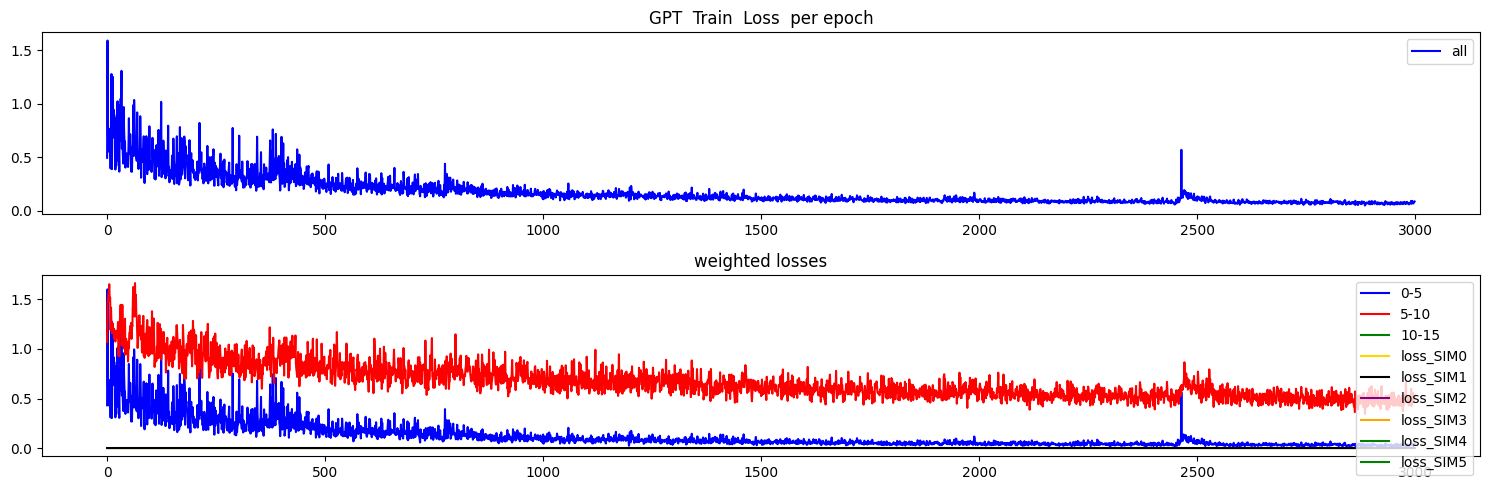

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


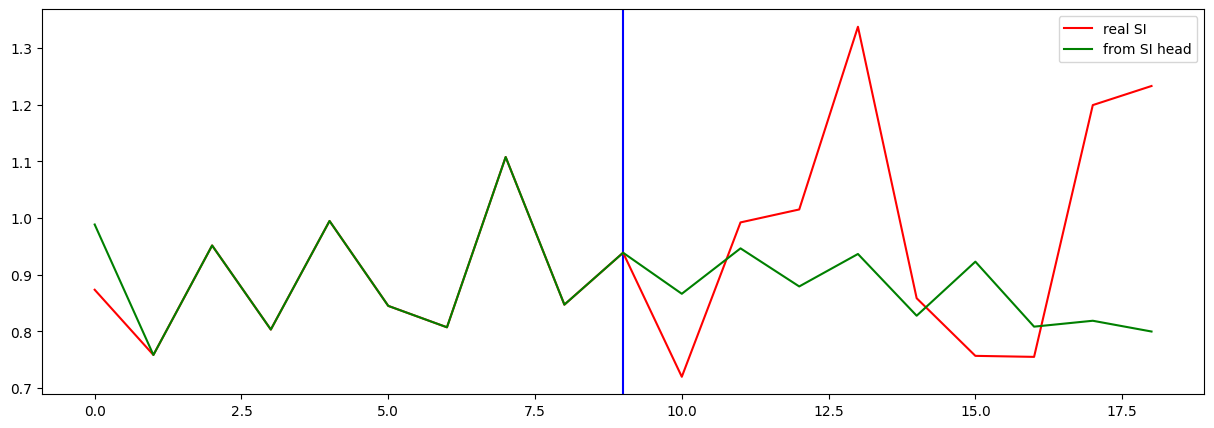

Testing R**2 - (all) - (no inputs):  0.895014428450241
Testing R**2 - (f2) - SI full (no inputs):  -0.36077700014513847
Testing R**2 - SI head only (no inputs):  -0.6506403680120549
0 ...index R**2 (no inputs):  -0.012321440315932852
1 ...index R**2 (no inputs):  -0.8830857418411575
2 ...index R**2 (no inputs):  -0.36077700014513847
3 ...index R**2 (no inputs):  -0.15212725661750204
4 ...index R**2 (no inputs):  -72.25216425178482
5 ...index R**2 (no inputs):  -32.22426616881456
6 ...index R**2 (no inputs):  -108.27578612683527
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16136195018138144
10 ...index R**2 (no inputs):  -0.6366070412881666
11 ...index R**2 (no inputs):  -2034.7364000503217
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.365989072918356
16 ...index R**2 (no inputs):  -0.5266888680278063
17 ...index R**2 (no inputs):  -1422.26

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.293119
Loss_SI: 0.19088514149188995 Loss_all: 1.2132264375686646
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.175163
Loss_SI: 0.09666547179222107 Loss_all: 0.8816438317298889
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.177784
Loss_SI: 0.11223342269659042 Loss_all: 0.7677354216575623
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.163868
Loss_SI: 0.1003461480140686 Loss_all: 0.7355665564537048
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.079988
Loss_SI: 0.03026554174721241 Loss_all: 0.5274858474731445
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.078667
Loss_SI: 0.04015832394361496 Loss_all: 0.425241082906723
Prediction shape: torch.Size([32, 35])
===


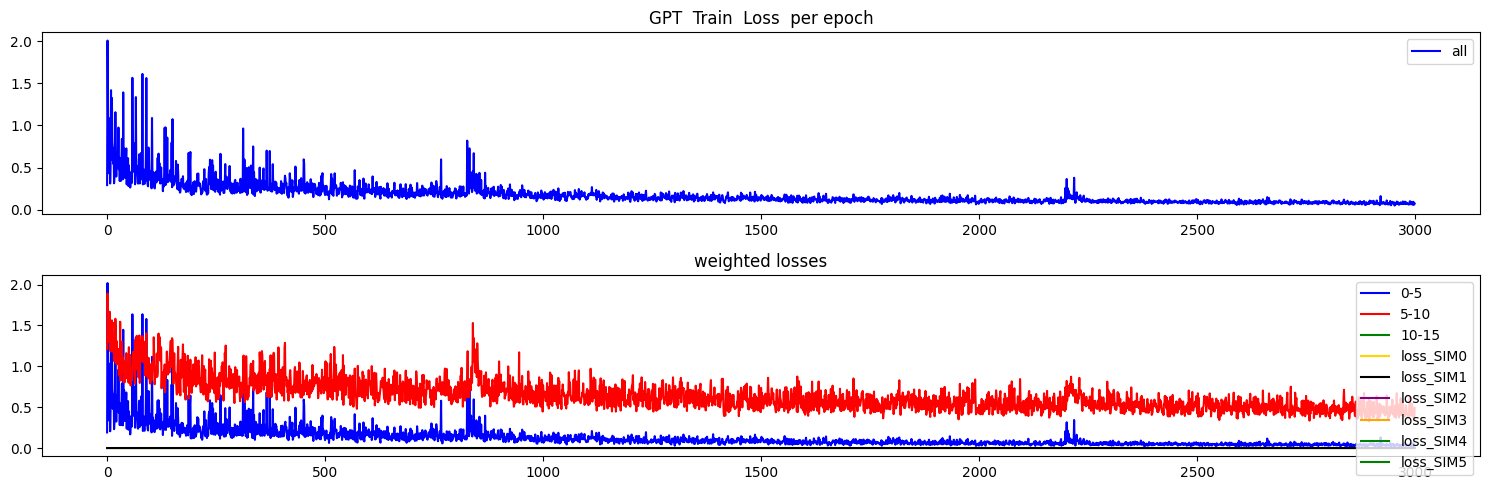

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


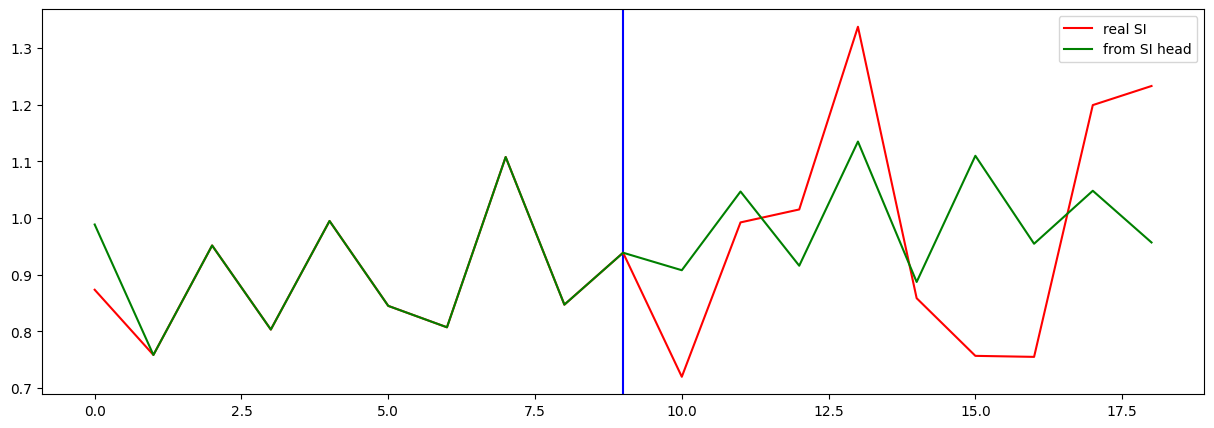

Testing R**2 - (all) - (no inputs):  0.9768999567099357
Testing R**2 - (f2) - SI full (no inputs):  -0.22879205418659088
Testing R**2 - SI head only (no inputs):  -0.3933220096322112
0 ...index R**2 (no inputs):  -0.16515373504273767
1 ...index R**2 (no inputs):  -0.7665036920619599
2 ...index R**2 (no inputs):  -0.22879205418659088
3 ...index R**2 (no inputs):  -9.523882558565935
4 ...index R**2 (no inputs):  -27.10404151288428
5 ...index R**2 (no inputs):  -6.26260907376054
6 ...index R**2 (no inputs):  -3183.3630599920257
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04084663614327777
10 ...index R**2 (no inputs):  -1.7774239410617576
11 ...index R**2 (no inputs):  -424.1252875631814
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.356245727473085
16 ...index R**2 (no inputs):  -2.0336723596118857
17 ...index R**2 (no inputs):  -1128.738970

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.542636
Loss_SI: 0.4786365032196045 Loss_all: 1.1186333894729614
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.089224
Loss_SI: 0.03693912550806999 Loss_all: 0.5597851276397705
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.061531
Loss_SI: 0.017103329300880432 Loss_all: 0.4613834023475647
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.054122
Loss_SI: 0.01750173792243004 Loss_all: 0.3837044835090637
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.039508
Loss_SI: 0.007955029606819153 Loss_all: 0.32348182797431946
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.035534
Loss_SI: 0.010228259488940239 Loss_all: 0.2632865309715271
Prediction shape: torch.Size([32, 35])
===


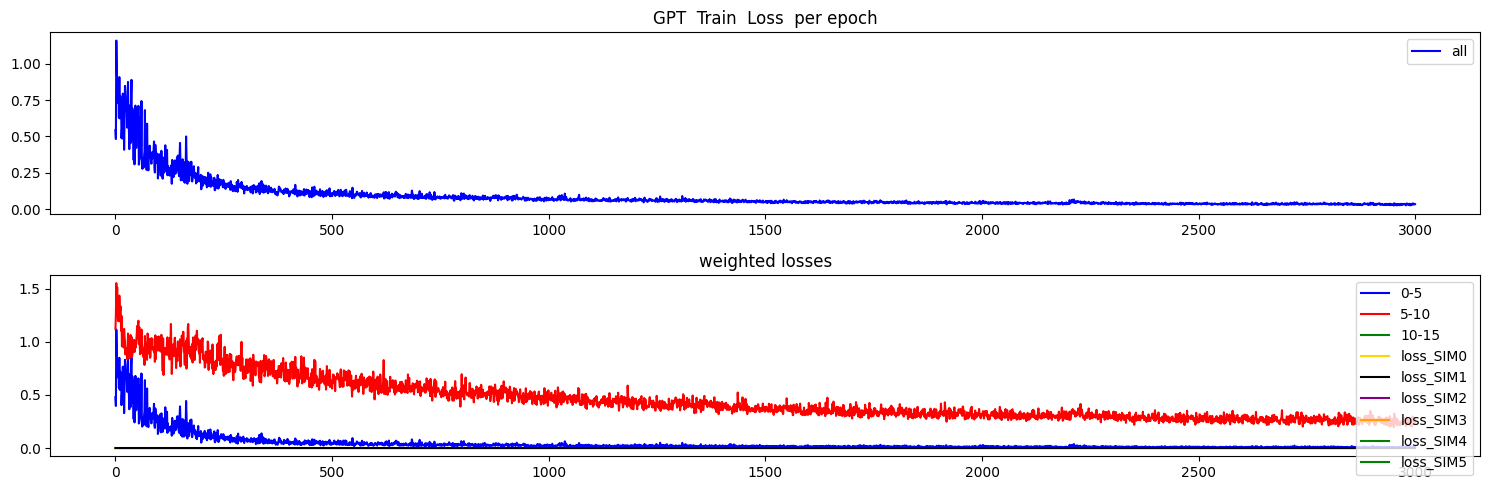

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


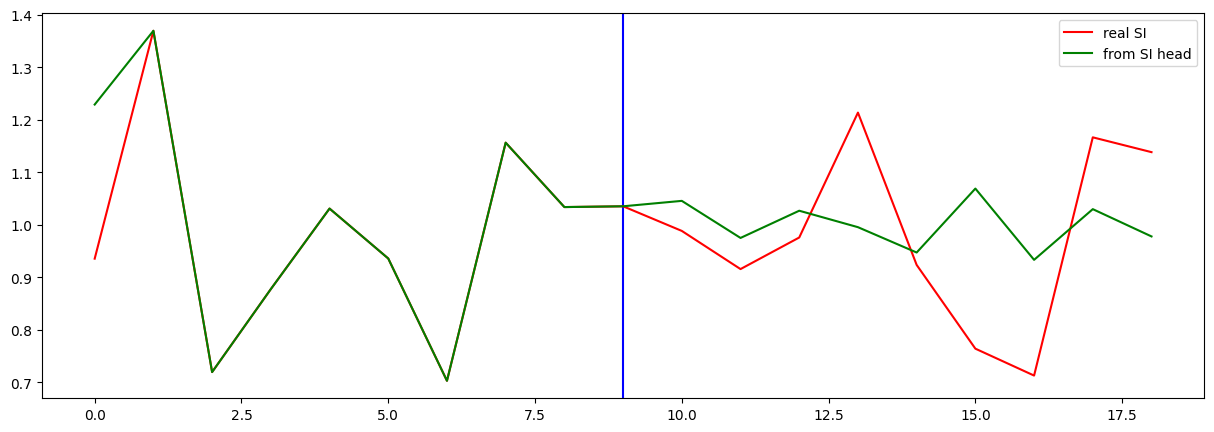

Testing R**2 - (all) - (no inputs):  0.9895144919402655
Testing R**2 - (f2) - SI full (no inputs):  -0.24697084599992358
Testing R**2 - SI head only (no inputs):  -0.18306597970826632
0 ...index R**2 (no inputs):  -0.25477054222486073
1 ...index R**2 (no inputs):  -0.09070615840312879
2 ...index R**2 (no inputs):  -0.24697084599992358
3 ...index R**2 (no inputs):  0.5294485608421644
4 ...index R**2 (no inputs):  -3.4142159494685496
5 ...index R**2 (no inputs):  -1.5198057112744072
6 ...index R**2 (no inputs):  -1877.0237751615891
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4825592749575256
10 ...index R**2 (no inputs):  -1.6893000459876268
11 ...index R**2 (no inputs):  -200.64765231155994
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0566231432493192
16 ...index R**2 (no inputs):  -0.17413590820779445
17 ...index R**2 (no inputs):  -403.

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.830336
Loss_SI: 0.7921460866928101 Loss_all: 1.1740466356277466
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.169334
Loss_SI: 0.0971284732222557 Loss_all: 0.819186806678772
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.090389
Loss_SI: 0.034506529569625854 Loss_all: 0.5933291912078857
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.080120
Loss_SI: 0.024021118879318237 Loss_all: 0.5850092172622681
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.075935
Loss_SI: 0.025388330221176147 Loss_all: 0.5308550000190735
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.068973
Loss_SI: 0.02815438061952591 Loss_all: 0.43634432554244995
Prediction shape: torch.Size([32, 35])
===


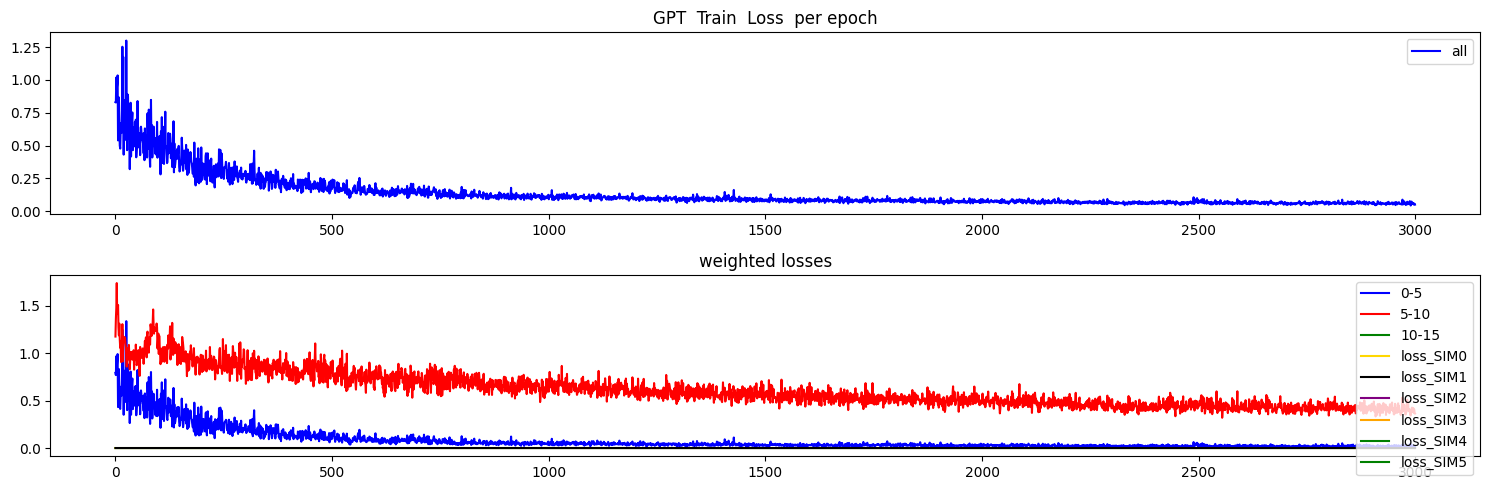

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


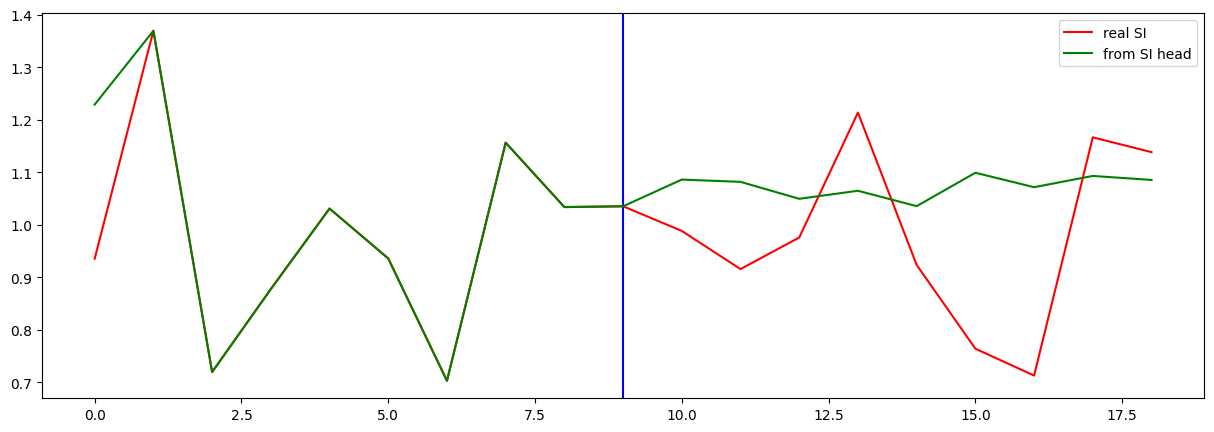

Testing R**2 - (all) - (no inputs):  0.9894961939060942
Testing R**2 - (f2) - SI full (no inputs):  -0.36766807313930894
Testing R**2 - SI head only (no inputs):  -0.42463065344161444
0 ...index R**2 (no inputs):  -0.3769205577712067
1 ...index R**2 (no inputs):  -1.3249058788576416
2 ...index R**2 (no inputs):  -0.36766807313930894
3 ...index R**2 (no inputs):  -0.4454730030443417
4 ...index R**2 (no inputs):  -2.002743977799443
5 ...index R**2 (no inputs):  -1.5226794033051538
6 ...index R**2 (no inputs):  -4615.508038532194
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0385835786941375
10 ...index R**2 (no inputs):  -1.056555336434391
11 ...index R**2 (no inputs):  -220.73847488980124
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.22781629375198142
16 ...index R**2 (no inputs):  -0.3062717968754518
17 ...index R**2 (no inputs):  -172.6267

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.863253
Loss_SI: 0.8388321399688721 Loss_all: 1.083040714263916
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.260740
Loss_SI: 0.18532344698905945 Loss_all: 0.9394856095314026
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.176351
Loss_SI: 0.12080220878124237 Loss_all: 0.6762895584106445
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.089104
Loss_SI: 0.02003755047917366 Loss_all: 0.7107006907463074
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.089131
Loss_SI: 0.03832919895648956 Loss_all: 0.5463461875915527
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.103952
Loss_SI: 0.061020977795124054 Loss_all: 0.4903346002101898
Prediction shape: torch.Size([32, 35])
===


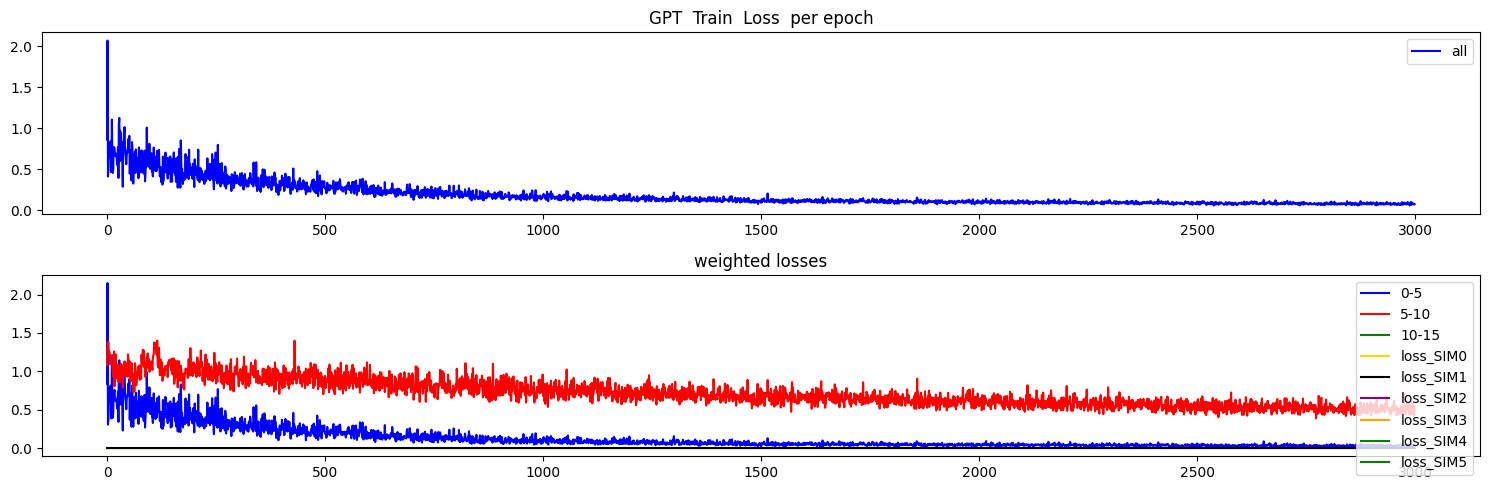

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


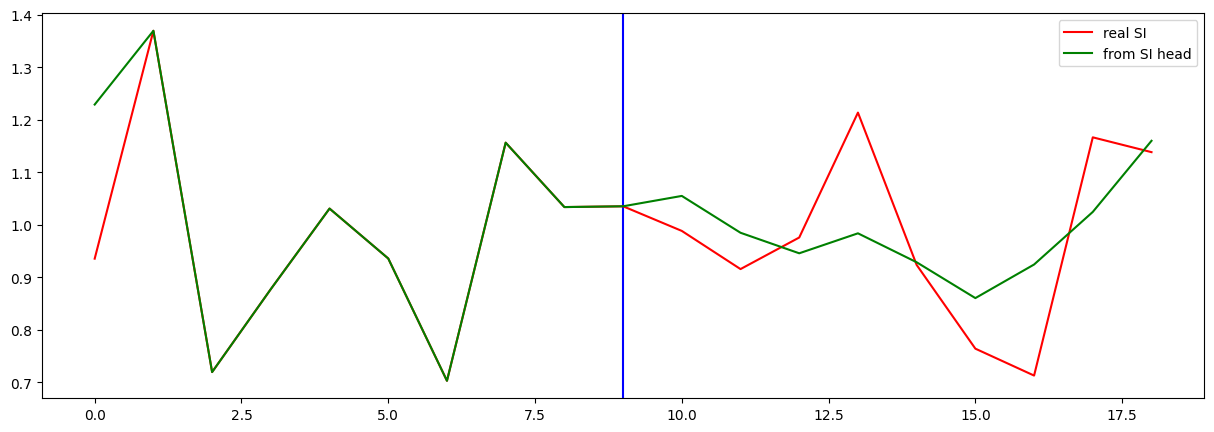

Testing R**2 - (all) - (no inputs):  0.9897882431541976
Testing R**2 - (f2) - SI full (no inputs):  -0.2602660681412954
Testing R**2 - SI head only (no inputs):  -0.10192679140953231
0 ...index R**2 (no inputs):  0.26725112991065014
1 ...index R**2 (no inputs):  -1.5726644031809371
2 ...index R**2 (no inputs):  -0.2602660681412954
3 ...index R**2 (no inputs):  -7.45097130385949
4 ...index R**2 (no inputs):  -7.653331334182772
5 ...index R**2 (no inputs):  -1.4355438167765762
6 ...index R**2 (no inputs):  -3304.35373673068
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.167663273751396
10 ...index R**2 (no inputs):  -1.536933053774301
11 ...index R**2 (no inputs):  -86.62388892952715
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.09107783899968136
16 ...index R**2 (no inputs):  -0.04895820465417078
17 ...index R**2 (no inputs):  -969.9374079492

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.946725
Loss_SI: 0.9488798379898071 Loss_all: 0.9273325800895691
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.290831
Loss_SI: 0.24164584279060364 Loss_all: 0.7334989905357361
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.256548
Loss_SI: 0.21153923869132996 Loss_all: 0.6616261601448059
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.106368
Loss_SI: 0.056393690407276154 Loss_all: 0.5561337471008301
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.137035
Loss_SI: 0.08022122085094452 Loss_all: 0.6483559012413025
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.084707
Loss_SI: 0.037322670221328735 Loss_all: 0.5111657381057739
Prediction shape: torch.Size([32, 35])
===


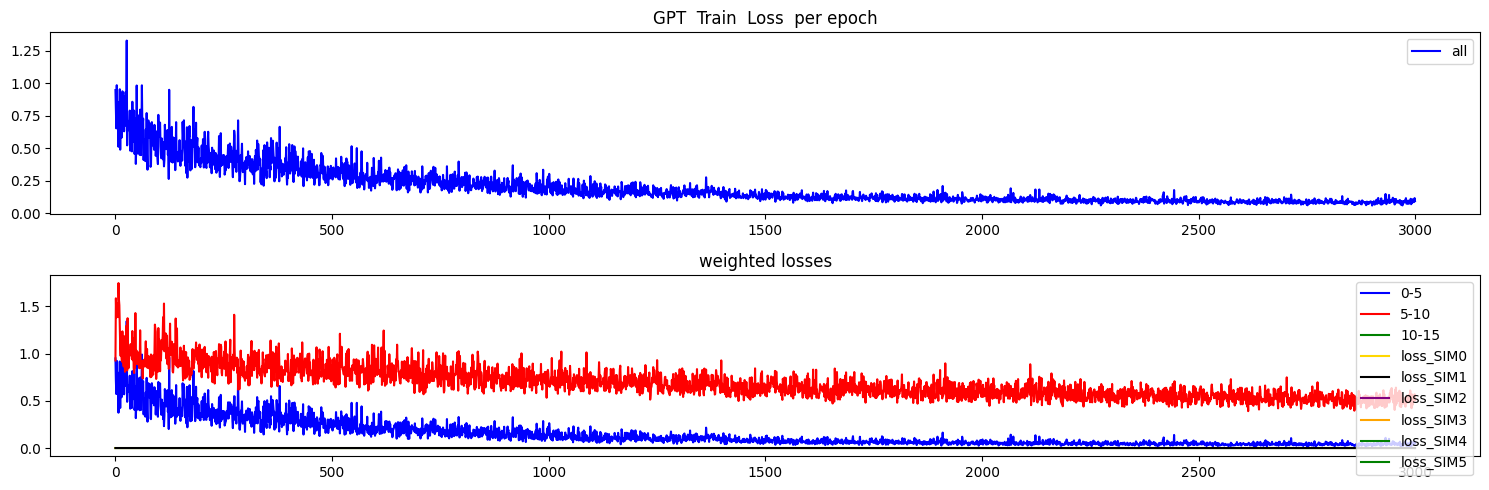

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


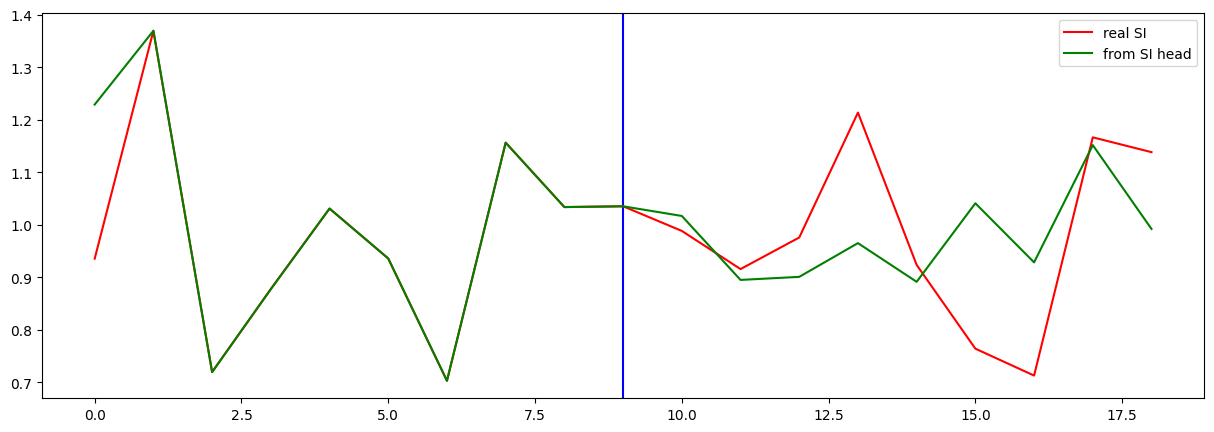

Testing R**2 - (all) - (no inputs):  0.9574034023240435
Testing R**2 - (f2) - SI full (no inputs):  0.07590039202219456
Testing R**2 - SI head only (no inputs):  -0.2450975284264394
0 ...index R**2 (no inputs):  -0.3362828537681377
1 ...index R**2 (no inputs):  -0.08264714338618906
2 ...index R**2 (no inputs):  0.07590039202219456
3 ...index R**2 (no inputs):  -4.460824197193719
4 ...index R**2 (no inputs):  -6.63111294696499
5 ...index R**2 (no inputs):  -9.283016037952887
6 ...index R**2 (no inputs):  -1612.531671895848
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.5893136808800539
10 ...index R**2 (no inputs):  -0.2551478842057622
11 ...index R**2 (no inputs):  -440.3770766531139
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7929082869836774
16 ...index R**2 (no inputs):  -0.04611534005413409
17 ...index R**2 (no inputs):  -524.297106294

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.783846
Loss_SI: 0.7189615368843079 Loss_all: 1.3678115606307983
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.087673
Loss_SI: 0.02713746577501297 Loss_all: 0.6324883103370667
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.058648
Loss_SI: 0.022629113867878914 Loss_all: 0.38282227516174316
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.042078
Loss_SI: 0.008745790459215641 Loss_all: 0.34207239747047424
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.036981
Loss_SI: 0.009197009727358818 Loss_all: 0.28703808784484863
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.035262
Loss_SI: 0.008433197624981403 Loss_all: 0.2767163813114166
Prediction shape: torch.Size([32, 35])
===


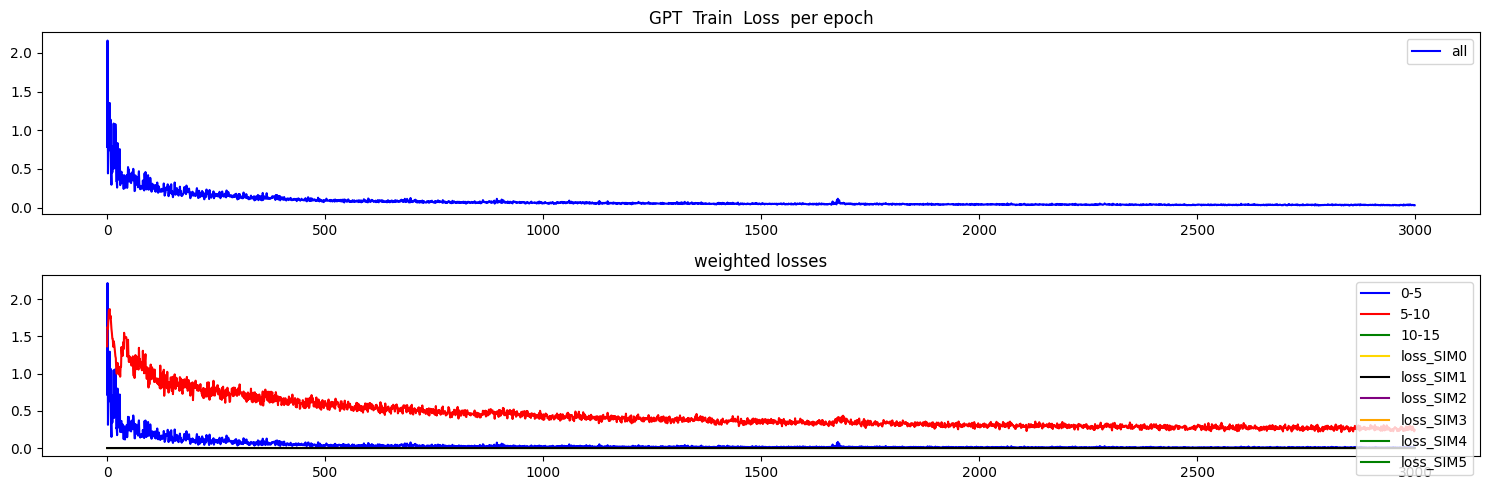

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


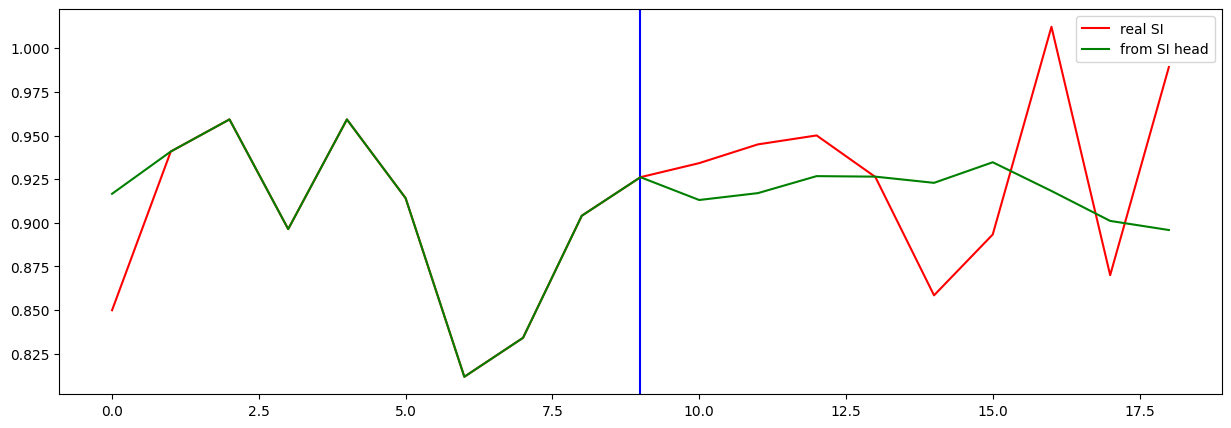

Testing R**2 - (all) - (no inputs):  0.9943136429254718
Testing R**2 - (f2) - SI full (no inputs):  -3.5502557329288384
Testing R**2 - SI head only (no inputs):  0.03460682116113989
0 ...index R**2 (no inputs):  -0.7204038177986904
1 ...index R**2 (no inputs):  -1.6443160415000424
2 ...index R**2 (no inputs):  -3.5502557329288384
3 ...index R**2 (no inputs):  -98.98447908347819
4 ...index R**2 (no inputs):  -272.5398268661617
5 ...index R**2 (no inputs):  -0.8424320057860435
6 ...index R**2 (no inputs):  -427.21920774962206
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12301221329610623
10 ...index R**2 (no inputs):  -0.04275998170763584
11 ...index R**2 (no inputs):  -7.368328343712266
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.050955009434502374
16 ...index R**2 (no inputs):  -0.2725595293546965
17 ...index R**2 (no inputs):  -13.26826

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.882557
Loss_SI: 0.8336948752403259 Loss_all: 1.322314739227295
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.156345
Loss_SI: 0.09989890456199646 Loss_all: 0.664359986782074
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.112353
Loss_SI: 0.06413882225751877 Loss_all: 0.5462847352027893
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.078692
Loss_SI: 0.02748347818851471 Loss_all: 0.5395727753639221
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.071746
Loss_SI: 0.02590898424386978 Loss_all: 0.4842832684516907
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.056717
Loss_SI: 0.02190488576889038 Loss_all: 0.3700276017189026
Prediction shape: torch.Size([32, 35])
===


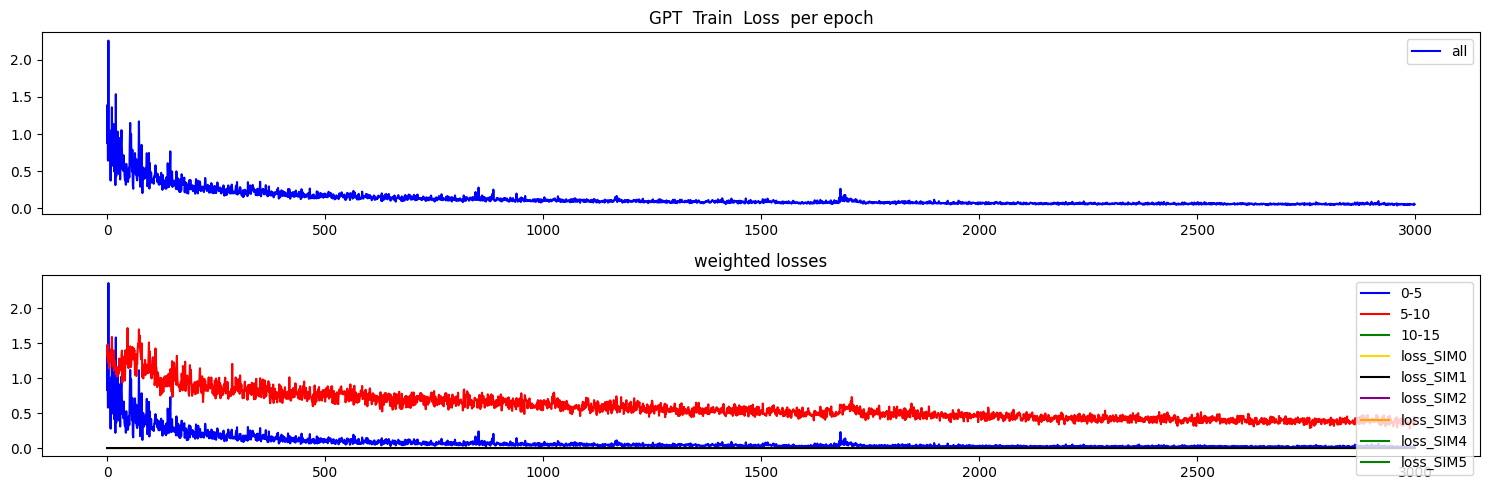

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


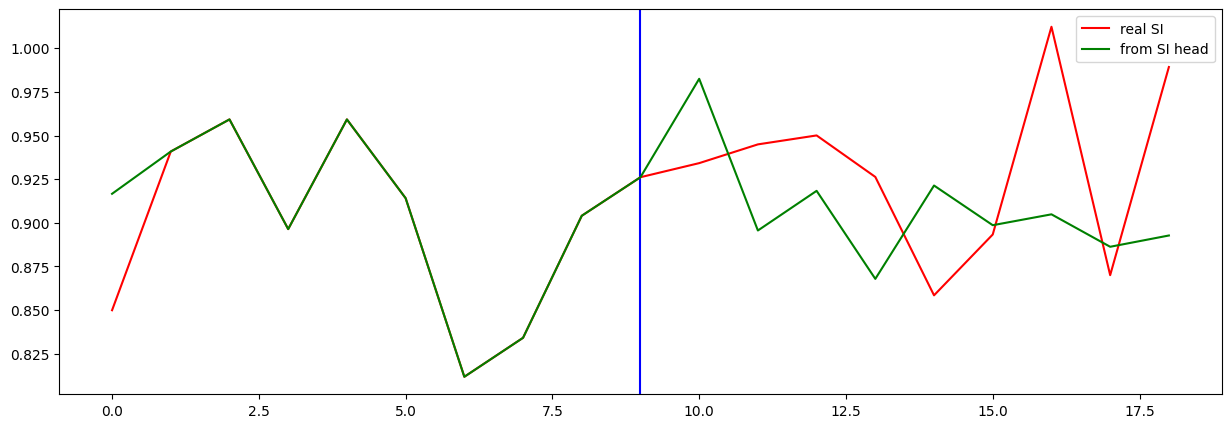

Testing R**2 - (all) - (no inputs):  0.9952739259414571
Testing R**2 - (f2) - SI full (no inputs):  -9.551045115480418
Testing R**2 - SI head only (no inputs):  -0.1913390691232737
0 ...index R**2 (no inputs):  -1.0352691948313733
1 ...index R**2 (no inputs):  -2.400129355132765
2 ...index R**2 (no inputs):  -9.551045115480418
3 ...index R**2 (no inputs):  -55.65915736630026
4 ...index R**2 (no inputs):  -253.1647073330822
5 ...index R**2 (no inputs):  -0.5288815074210975
6 ...index R**2 (no inputs):  -302.07021242829546
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.15853187699561921
10 ...index R**2 (no inputs):  0.09836054782620007
11 ...index R**2 (no inputs):  -185.8128294847449
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.026939276563685555
16 ...index R**2 (no inputs):  -0.10271330346602658
17 ...index R**2 (no inputs):  -40.27234868

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.618645
Loss_SI: 0.5261586308479309 Loss_all: 1.4510271549224854
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.254872
Loss_SI: 0.17043691873550415 Loss_all: 1.0147911310195923
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.231350
Loss_SI: 0.1709315925836563 Loss_all: 0.7751148343086243
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.092103
Loss_SI: 0.04114517569541931 Loss_all: 0.5507214069366455
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.088912
Loss_SI: 0.03962157666683197 Loss_all: 0.5325291752815247
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076506
Loss_SI: 0.03638463467359543 Loss_all: 0.43760010600090027
Prediction shape: torch.Size([32, 35])
===


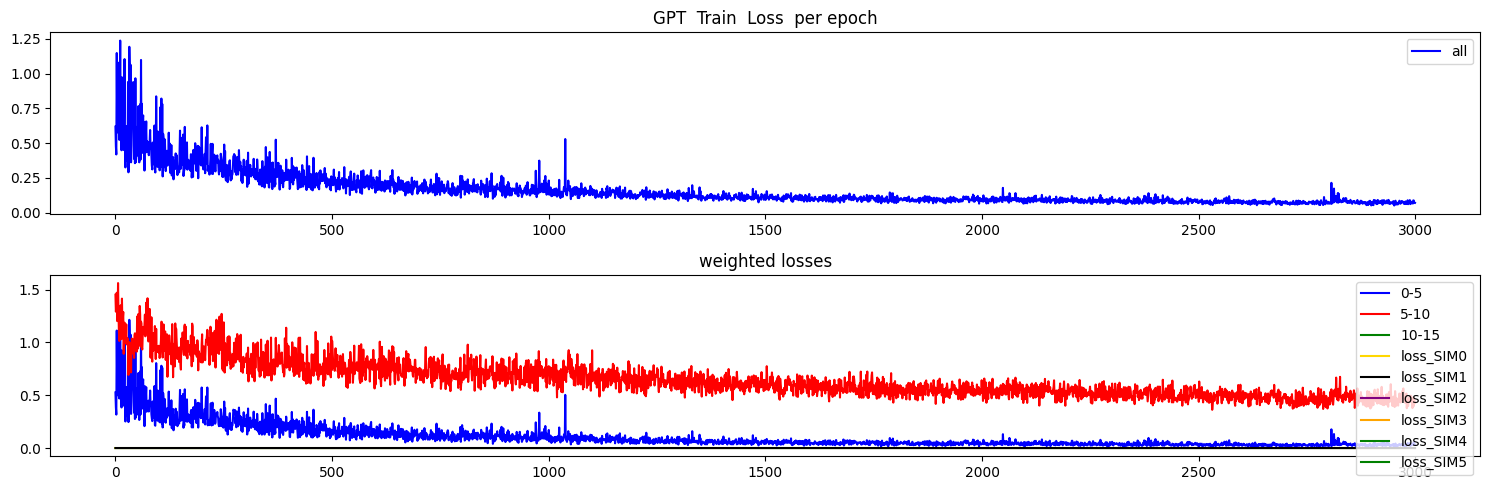

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


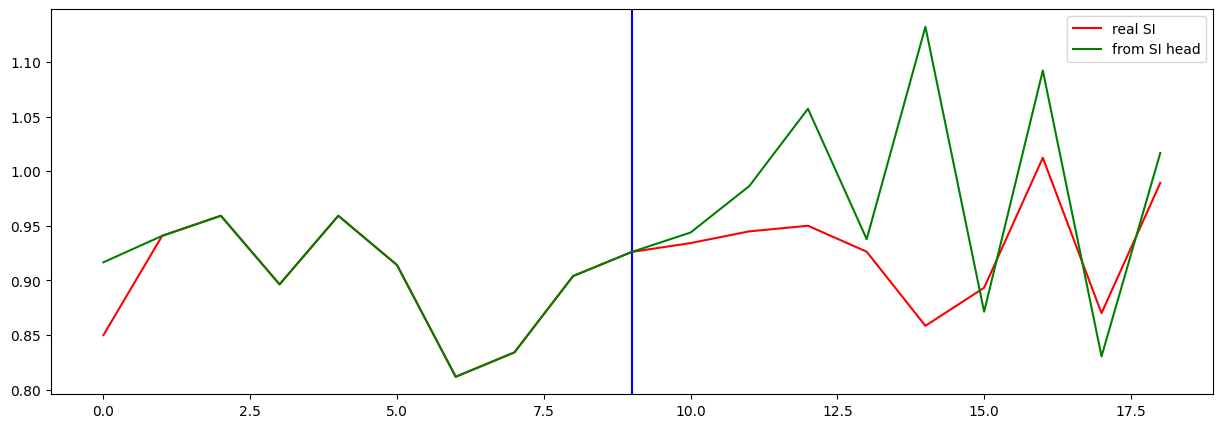

Testing R**2 - (all) - (no inputs):  0.9465437987153145
Testing R**2 - (f2) - SI full (no inputs):  -4.218724298251022
Testing R**2 - SI head only (no inputs):  -6.623556801652247
0 ...index R**2 (no inputs):  -4.2767567776656294
1 ...index R**2 (no inputs):  -15.99890746836881
2 ...index R**2 (no inputs):  -4.218724298251022
3 ...index R**2 (no inputs):  -3335.6351204029893
4 ...index R**2 (no inputs):  -159.10570372598474
5 ...index R**2 (no inputs):  -16.531585625882514
6 ...index R**2 (no inputs):  -1848.2439698039368
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09432343488910822
10 ...index R**2 (no inputs):  -1.5074895526819176
11 ...index R**2 (no inputs):  -1572.1601507471826
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.7551572675911937
16 ...index R**2 (no inputs):  -0.3518708880791459
17 ...index R**2 (no inputs):  -187.52034720

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.907441
Loss_SI: 0.8576616048812866 Loss_all: 1.3554555177688599
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.218685
Loss_SI: 0.15068170428276062 Loss_all: 0.8307169079780579
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.219184
Loss_SI: 0.15308286249637604 Loss_all: 0.8140976428985596
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.179397
Loss_SI: 0.12547370791435242 Loss_all: 0.6647018194198608
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.137075
Loss_SI: 0.08063334971666336 Loss_all: 0.6450471878051758
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.097177
Loss_SI: 0.03791101276874542 Loss_all: 0.6305716037750244
Prediction shape: torch.Size([32, 35])
===


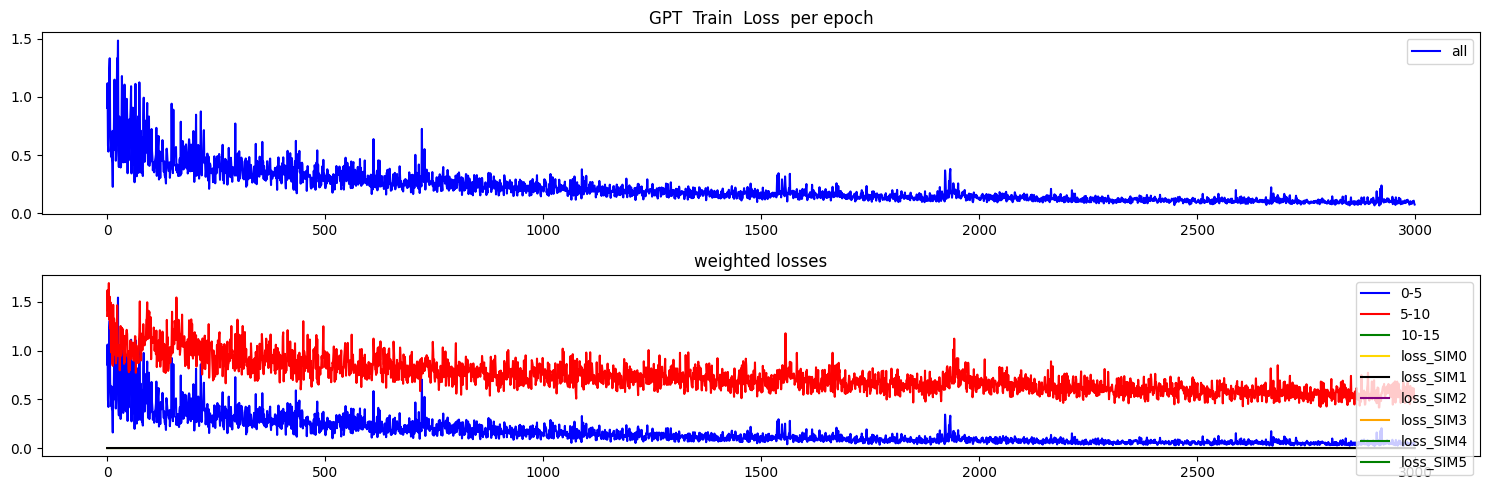

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


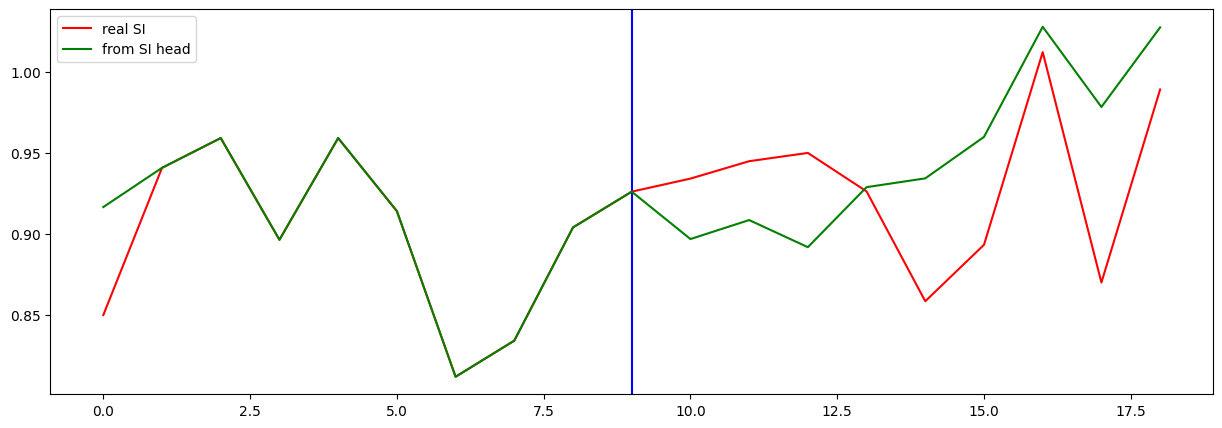

Testing R**2 - (all) - (no inputs):  0.9867002180417184
Testing R**2 - (f2) - SI full (no inputs):  -4.363060227623754
Testing R**2 - SI head only (no inputs):  -1.6615137411938945
0 ...index R**2 (no inputs):  -0.6804118988750638
1 ...index R**2 (no inputs):  -0.7765136930320651
2 ...index R**2 (no inputs):  -4.363060227623754
3 ...index R**2 (no inputs):  -4156.528260952187
4 ...index R**2 (no inputs):  -2919.4095357989604
5 ...index R**2 (no inputs):  -3.2021376487523803
6 ...index R**2 (no inputs):  -1541.531155452371
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.006951868795706195
10 ...index R**2 (no inputs):  0.19473805734708804
11 ...index R**2 (no inputs):  -623.0809553602398
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.131656621858231
16 ...index R**2 (no inputs):  -0.8061572092059794
17 ...index R**2 (no inputs):  -386.670362628

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.638028
Loss_SI: 0.547099232673645 Loss_all: 1.4563889503479004
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.095813
Loss_SI: 0.03294368088245392 Loss_all: 0.6616320013999939
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.079116
Loss_SI: 0.03691646456718445 Loss_all: 0.45891112089157104
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.059918
Loss_SI: 0.021106060594320297 Loss_all: 0.4092303514480591
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.053650
Loss_SI: 0.010434014722704887 Loss_all: 0.4425889849662781
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.040266
Loss_SI: 0.011323428712785244 Loss_all: 0.30074945092201233
Prediction shape: torch.Size([32, 35])
===


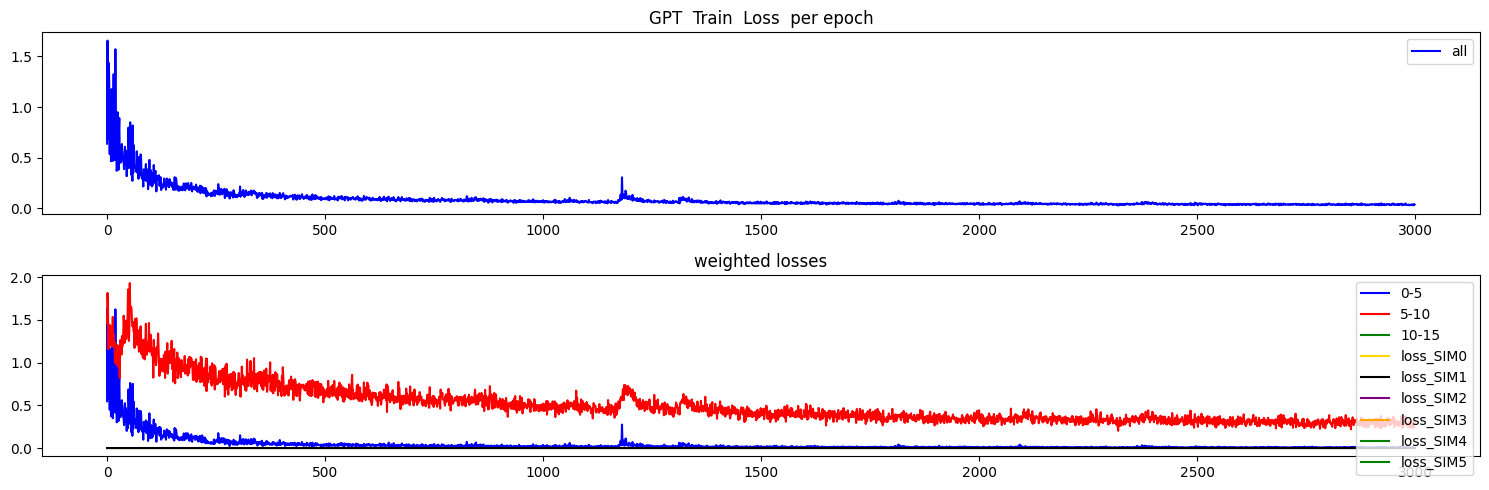

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


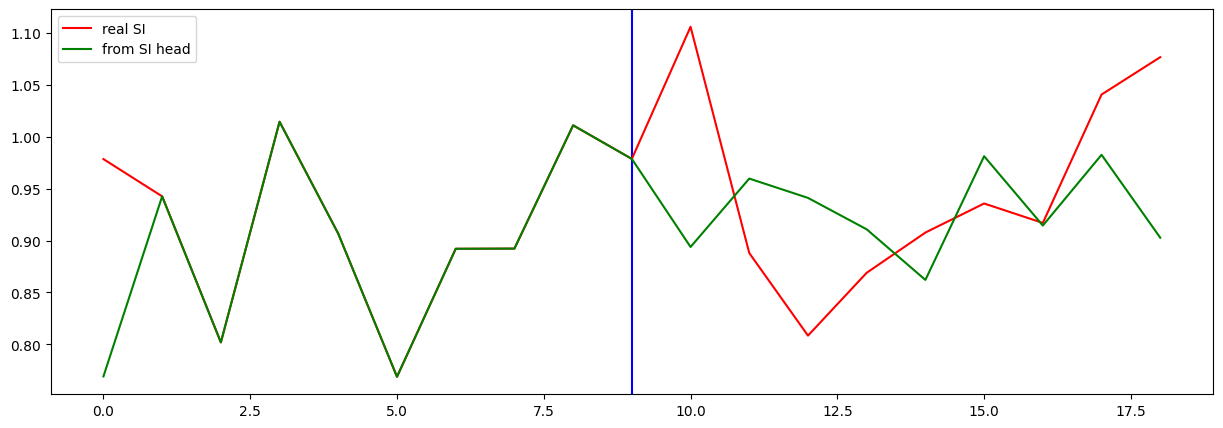

Testing R**2 - (all) - (no inputs):  0.9627825012935827
Testing R**2 - (f2) - SI full (no inputs):  -1.8448971402281655
Testing R**2 - SI head only (no inputs):  -0.20092055162168454
0 ...index R**2 (no inputs):  -0.4693896065895944
1 ...index R**2 (no inputs):  -4.331794113005918
2 ...index R**2 (no inputs):  -1.8448971402281655
3 ...index R**2 (no inputs):  -31.310575410933872
4 ...index R**2 (no inputs):  -22.60046385660742
5 ...index R**2 (no inputs):  -1.690096718703547
6 ...index R**2 (no inputs):  -1.2328184372286821
7 ...index R**2 (no inputs):  -4.531602500611453
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.33146479960783104
10 ...index R**2 (no inputs):  -0.3326435131259142
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.290881927780207
16 ...index R**2 (no inputs):  -1.1674974916612313
17 ...index R**2 (no inputs):  -51.93908691

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.734438
Loss_SI: 0.6511127352714539 Loss_all: 1.4843697547912598
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.164969
Loss_SI: 0.09440011531114578 Loss_all: 0.800084114074707
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.107491
Loss_SI: 0.05734901502728462 Loss_all: 0.5587676763534546
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.077653
Loss_SI: 0.0283844955265522 Loss_all: 0.5210700035095215
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.069260
Loss_SI: 0.02400979772210121 Loss_all: 0.4765092730522156
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.061494
Loss_SI: 0.018444610759615898 Loss_all: 0.4489351809024811
Prediction shape: torch.Size([32, 35])
===


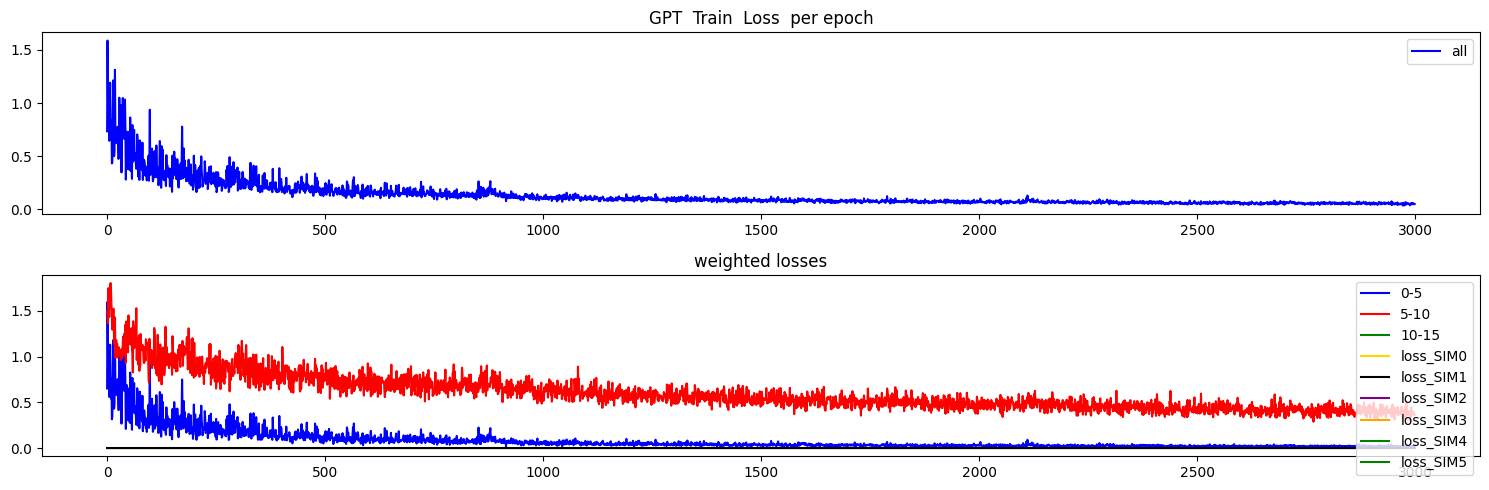

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


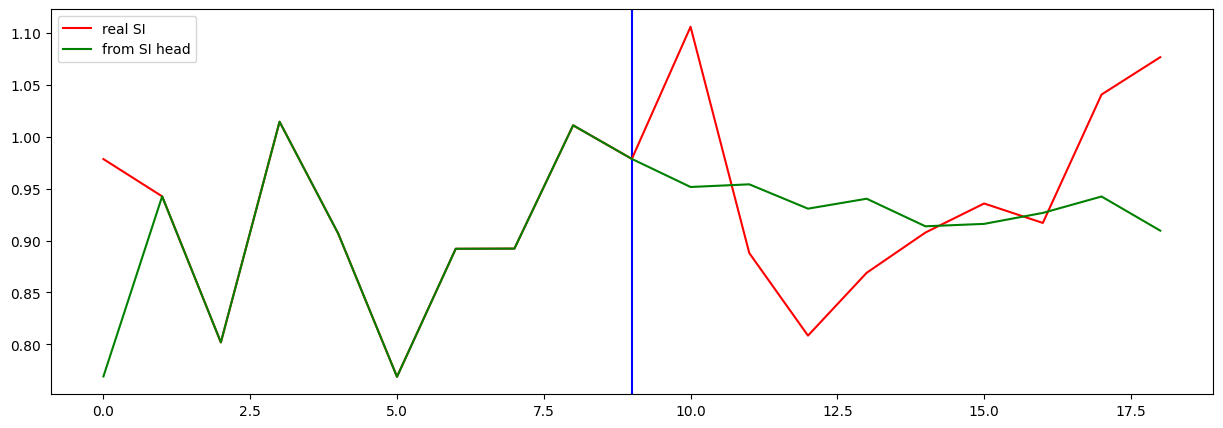

Testing R**2 - (all) - (no inputs):  0.962538394685657
Testing R**2 - (f2) - SI full (no inputs):  -1.8595902725149727
Testing R**2 - SI head only (no inputs):  -0.16978964905286364
0 ...index R**2 (no inputs):  -0.6624052968993304
1 ...index R**2 (no inputs):  0.2328296576975749
2 ...index R**2 (no inputs):  -1.8595902725149727
3 ...index R**2 (no inputs):  -26.163719411973066
4 ...index R**2 (no inputs):  -3.9273137358586334
5 ...index R**2 (no inputs):  -1.707878085021859
6 ...index R**2 (no inputs):  -7.21879703082509
7 ...index R**2 (no inputs):  -3.7852932649758575
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08662446085087683
10 ...index R**2 (no inputs):  0.0652687025361357
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.765133279678597
16 ...index R**2 (no inputs):  -0.8488678826609559
17 ...index R**2 (no inputs):  -200.047630818

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.399683
Loss_SI: 0.3350929617881775 Loss_all: 0.9809930920600891
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.324132
Loss_SI: 0.2643110156059265 Loss_all: 0.8625204563140869
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.197636
Loss_SI: 0.1469254195690155 Loss_all: 0.6540294289588928
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.097365
Loss_SI: 0.04850608855485916 Loss_all: 0.5370938181877136
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.106338
Loss_SI: 0.06016473472118378 Loss_all: 0.5218966007232666
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.075198
Loss_SI: 0.034525349736213684 Loss_all: 0.4412490427494049
Prediction shape: torch.Size([32, 35])
===


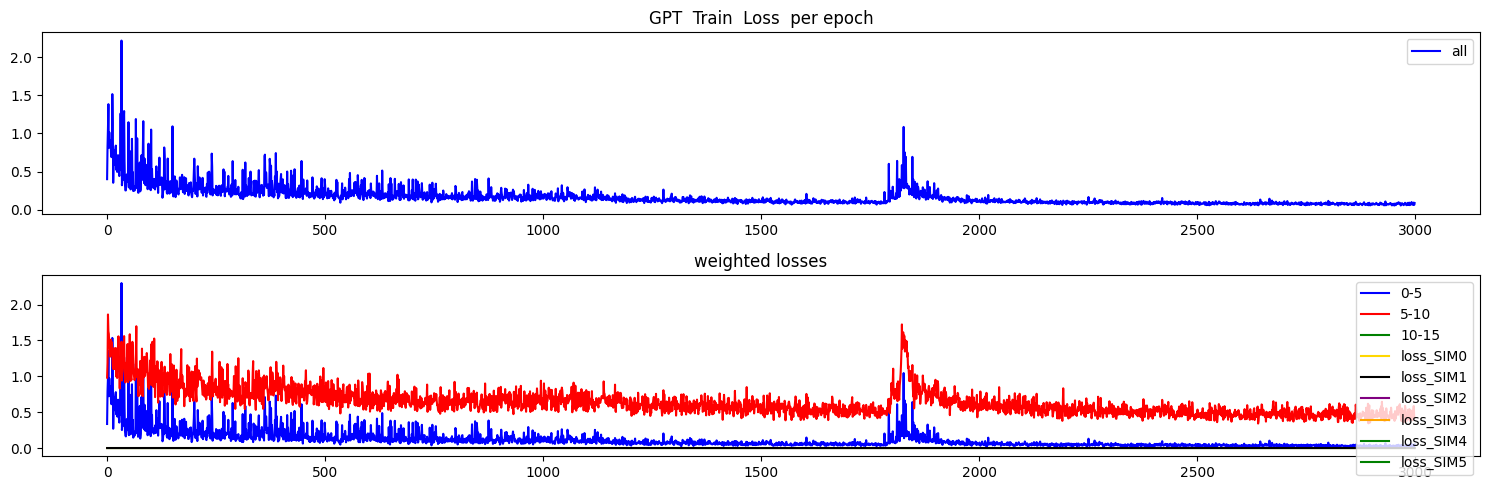

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


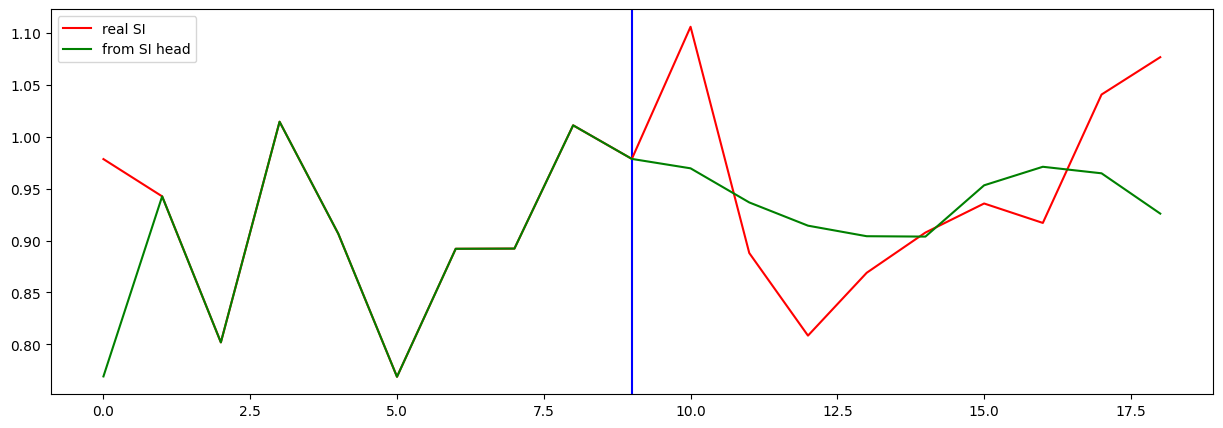

Testing R**2 - (all) - (no inputs):  0.9695250221148224
Testing R**2 - (f2) - SI full (no inputs):  -0.39627605802637267
Testing R**2 - SI head only (no inputs):  0.16106672616710527
0 ...index R**2 (no inputs):  -0.38645923713190933
1 ...index R**2 (no inputs):  -4.510392163322064
2 ...index R**2 (no inputs):  -0.39627605802637267
3 ...index R**2 (no inputs):  -15.183335812288615
4 ...index R**2 (no inputs):  -1080.2707813064114
5 ...index R**2 (no inputs):  -1.1866507976653429
6 ...index R**2 (no inputs):  -41.724371509221875
7 ...index R**2 (no inputs):  -3.578713100667506
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02306095589834367
10 ...index R**2 (no inputs):  0.013271453648566967
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -30.614208461112224
16 ...index R**2 (no inputs):  -0.36958794627968117
17 ...index R**2 (no inputs):  -2978.

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.591719
Loss_SI: 0.5529643893241882 Loss_all: 0.9405116438865662
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.206297
Loss_SI: 0.132365882396698 Loss_all: 0.8716778755187988
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.194526
Loss_SI: 0.15528742969036102 Loss_all: 0.5476769804954529
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.117942
Loss_SI: 0.06046292930841446 Loss_all: 0.6352566480636597
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.103064
Loss_SI: 0.0704742968082428 Loss_all: 0.3963664770126343
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.067111
Loss_SI: 0.025119639933109283 Loss_all: 0.4450360834598541
Prediction shape: torch.Size([32, 35])
===


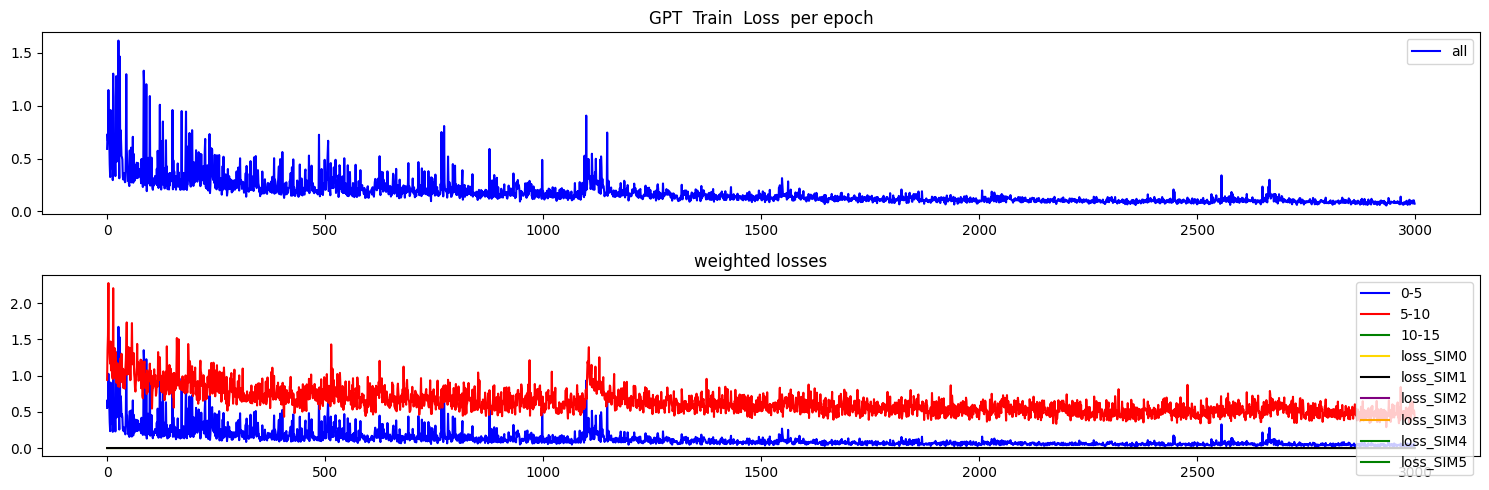

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


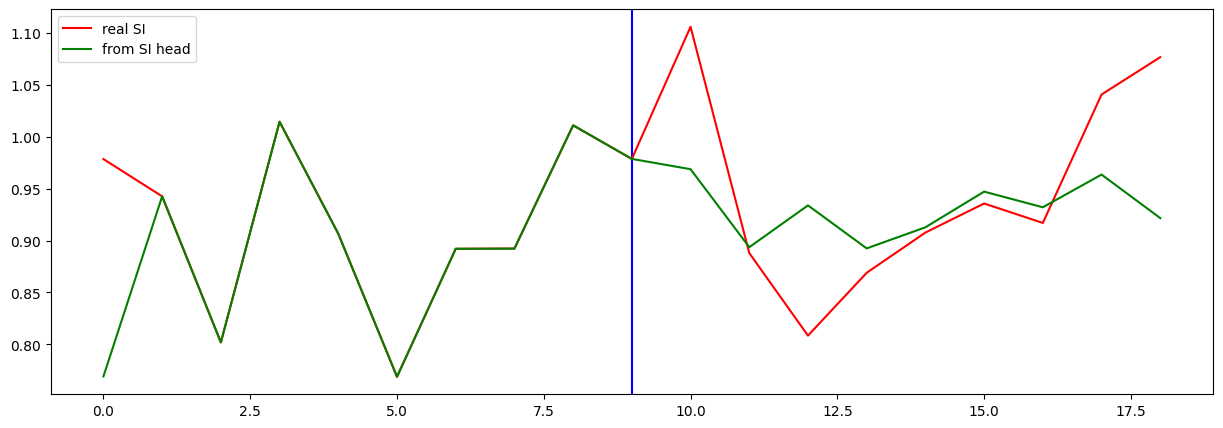

Testing R**2 - (all) - (no inputs):  0.9364095396629023
Testing R**2 - (f2) - SI full (no inputs):  0.02992854581755844
Testing R**2 - SI head only (no inputs):  0.16384937271820466
0 ...index R**2 (no inputs):  -0.09771807230461627
1 ...index R**2 (no inputs):  -0.9838191723485461
2 ...index R**2 (no inputs):  0.02992854581755844
3 ...index R**2 (no inputs):  -16.70756932996756
4 ...index R**2 (no inputs):  -38.69958970906558
5 ...index R**2 (no inputs):  -3.5966708984382354
6 ...index R**2 (no inputs):  -240.73478540430702
7 ...index R**2 (no inputs):  -3.662510416545974
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.03583004544374924
10 ...index R**2 (no inputs):  0.001480222605669712
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.179383208321894
16 ...index R**2 (no inputs):  0.11365990757404643
17 ...index R**2 (no inputs):  -615.49664

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.0128551722331387


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.31160502809258683


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.47677354149651574


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.2976278346195771



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -2.3602417895771537
2 .....R² on first n steps: 0.0984307200707889
3 .....R² on first n steps: 0.3955351281247971
4 .....R² on first n steps: 0.34840195467319146
5 .....R² on first n steps: 0.2508158304594196
6 .....R² on first n steps: -0.10221972007110103
7 .....R² on first n steps: -0.04092152726358478
8 .....R² on first n steps: 0.029281862160893124
9 .....R² on first n steps: -0.0128551722331387


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -8.708018274392181
2 .....R² on first n steps: -0.8721192800008559
3 .....R² on first n steps: -0.3793661521012752
4 .....R² on first n steps: -0.4131867456448597
5 .....R² on first n steps: -0.3625476560652996
6 .....R² on first n steps: -0.6085856579981919
7 .....R² on first n steps: -0.41241537697241304
8 .....R² on first n steps: -0.2791035029631803
9 .....R² on first n steps: -0.31160502809258683


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -4.8119310875579515
2 .....R² on first n steps: -0.62560673339349
3 .....R² on first n steps: -0.315279764925976
4 .....R² on first n steps: -0.28037633173739196
5 .....R² on first n steps: -0.27452371307534396
6 .....R² on first n steps: -0.2579375134384818
7 .....R² on first n steps: -0.3315636604944201
8 .....R² on first n steps: -0.38027439013224784
9 .....R² on first n steps: -0.47677354149651574


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -4.910984598556713
2 .....R² on first n steps: -0.12603189516311852
3 .....R² on first n steps: -0.25125254102152517
4 .....R² on first n steps: -0.41886288257582893
5 .....R² on first n steps: -0.2600284312272181
6 .....R² on first n steps: -0.5712566426675816
7 .....R² on first n steps: -0.39537127745355516
8 .....R² on first n steps: -0.24542362936714013
9 .....R² on first n steps: -0.2976278346195771



## Plot


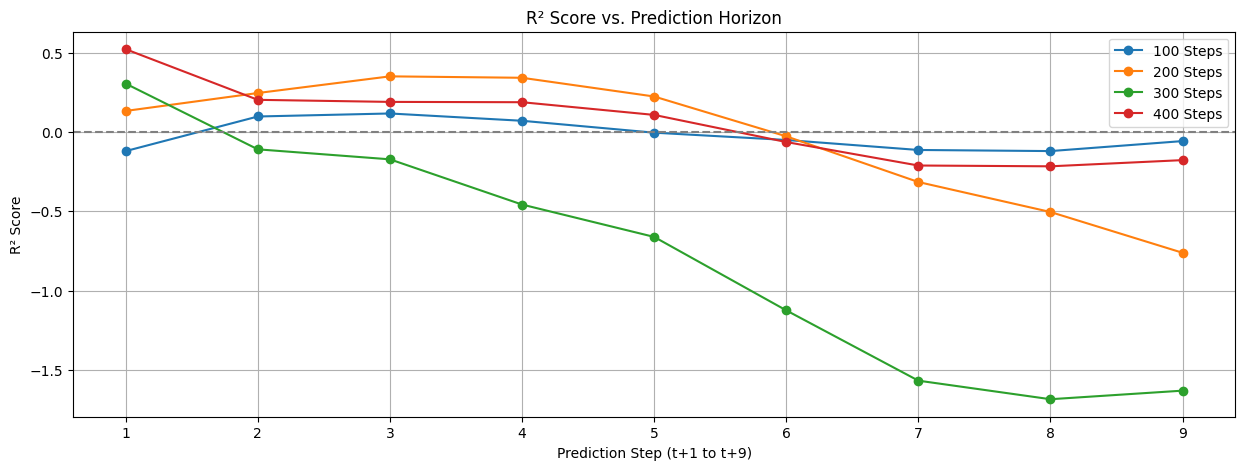

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
